(content:chapter:mesh)=

# Mesh Analysis

In [1]:
import schemdraw.elements as elm
import schemdraw
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'


```{index} Mesh Analysis

```

We often refer to mesh analysis as a _method_ of analysis as that is the goal of this analysis, to perform it methodically. As mentioned in the previous chapter, many folks choose to analyze circuits by haphazardly applying a combination of the fundamental laws, equivalent components, and the divider equations in order to find a single value of interest. Mesh analysis is organized and consistent when performed correctly. Furthermore, once we find the unknowns, we can use them to find any other value of interest in the circuit.

## Relating Circuit Values to Mesh Currents

The unknowns in this case are the currents flowing around each mesh of the circuit. Let's take a step back and first use the mesh current to find expressions for other values in the circuit. It's a bit of make-believe to begin with but it will help as we develop the method. Let's pretend we already know the mesh currents and want to use them to determine other currents and voltages in the circuit.

### Currents

Let's start with the circuit shown here

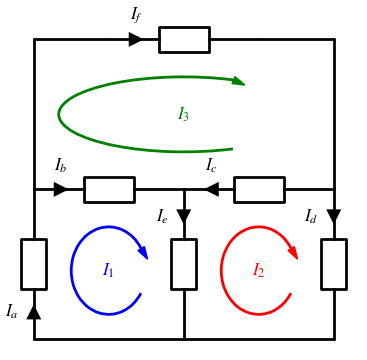

In [2]:
with schemdraw.Drawing(file='using-mesh-currents.svg') as d:
    d += (R1 := elm.RBox().up())
    d += elm.CurrentLabelInline(direction='in').at(R1).label('$I_a$')
    d += (R2 := elm.RBox().right())
    d += elm.CurrentLabelInline(direction='in').at(R2).label('$I_b$')
    d += (R3 := elm.RBox().right())
    d += elm.CurrentLabelInline(direction='out').at(R3).label('$I_c$')
    d += (R4 := elm.RBox().down())
    d += elm.CurrentLabelInline(direction='in').at(R4).label('$I_d$')
    d += (R5 := elm.RBox().down().at(R2.end))
    d += elm.CurrentLabelInline(direction='in').at(R5).label('$I_e$')
    d += (LB := elm.Line().at(R1.start).right().tox(R4.end))
    d += (LL := elm.Line().at(R1.end).up())
    d += elm.Line().right().tox(R2.center)
    d += (R6 := elm.RBox().right())
    d += elm.CurrentLabelInline(direction='in').at(R6).label('$I_f$')
    d += elm.Line().right().tox(R4.end)
    d += (LR := elm.Line().down().toy(R4.start))
    d += elm.LoopCurrent([R2,R5,LB,R1],pad=0.5).label('$I_1$').color('blue')
    d += elm.LoopCurrent([R3,R4,LB,R5],pad=0.5).label('$I_2$').color('red')
    d += elm.LoopCurrent([R6,LR,R2,LL],pad=0.5).label('$I_3$').color('green')

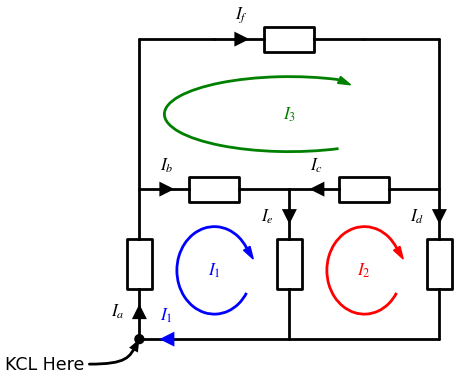

In [3]:



with schemdraw.Drawing(file='find-Ia.svg') as d:
    d += elm.Dot()
    d += (R1 := elm.RBox().up())
    d += elm.CurrentLabelInline(direction='in').at(R1).label('$I_a$')
    d += (R2 := elm.RBox().right())
    d += elm.CurrentLabelInline(direction='in').at(R2).label('$I_b$')
    d += (R3 := elm.RBox().right())
    d += elm.CurrentLabelInline(direction='out').at(R3).label('$I_c$')
    d += (R4 := elm.RBox().down())
    d += elm.CurrentLabelInline(direction='in').at(R4).label('$I_d$')
    d += (R5 := elm.RBox().down().at(R2.end))
    d += elm.CurrentLabelInline(direction='in').at(R5).label('$I_e$')
    d += (LB := elm.Line().at(R1.start).right().tox(R5.end))
    d += elm.CurrentLabelInline(direction='out').at(LB).label('$I_1$').color('blue')
    d += (LBR := elm.Line().at(R5.end).right().tox(R4.end))
    d += (LL := elm.Line().at(R1.end).up())
    d += elm.Line().right().tox(R2.center)
    d += (R6 := elm.RBox().right())
    d += elm.CurrentLabelInline(direction='in').at(R6).label('$I_f$')
    d += elm.Line().right().tox(R4.end)
    d += (LR := elm.Line().down().toy(R4.start))
    d += elm.LoopCurrent([R2,R5,LB,R1],pad=0.5).label('$I_1$').color('blue')
    d += elm.LoopCurrent([R3,R4,LB,R5],pad=0.5).label('$I_2$').color('red')
    d += elm.LoopCurrent([R6,LR,R2,LL],pad=0.5).label('$I_3$').color('green')
    d += elm.Annotate().at(R1.start).delta(dx=-1, dy=-.5).label('KCL Here')

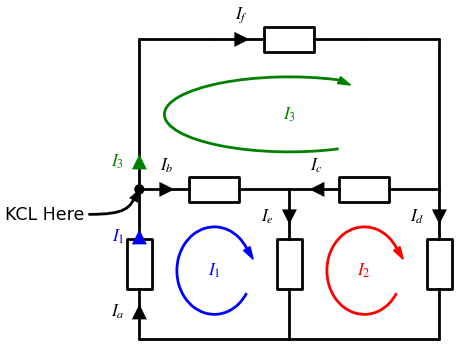

In [4]:



with schemdraw.Drawing(file='find-Ib.svg') as d:
    d += (R1 := elm.RBox().up())
    d += elm.Dot()
    d += elm.CurrentLabelInline(direction='in').at(R1.end).label('$I_1$').color('blue')
    d += elm.CurrentLabelInline(direction='in').at(R1).label('$I_a$')
    d += (R2 := elm.RBox().right())
    d += elm.CurrentLabelInline(direction='in').at(R2).label('$I_b$')
    d += (R3 := elm.RBox().right())
    d += elm.CurrentLabelInline(direction='out').at(R3).label('$I_c$')
    d += (R4 := elm.RBox().down())
    d += elm.CurrentLabelInline(direction='in').at(R4).label('$I_d$')
    d += (R5 := elm.RBox().down().at(R2.end))
    d += elm.CurrentLabelInline(direction='in').at(R5).label('$I_e$')
    d += (LB := elm.Line().at(R1.start).right().tox(R5.end))
    d += (LBR := elm.Line().at(R5.end).right().tox(R4.end))
    d += (LL := elm.Line().at(R1.end).up())
    d += elm.CurrentLabelInline(direction='in').at(LL).label('$I_3$').color('green')
    d += elm.Line().right().tox(R2.center)
    d += (R6 := elm.RBox().right())
    d += elm.CurrentLabelInline(direction='in').at(R6).label('$I_f$')
    d += elm.Line().right().tox(R4.end)
    d += (LR := elm.Line().down().toy(R4.start))
    d += elm.LoopCurrent([R2,R5,LB,R1],pad=0.5).label('$I_1$').color('blue')
    d += elm.LoopCurrent([R3,R4,LB,R5],pad=0.5).label('$I_2$').color('red')
    d += elm.LoopCurrent([R6,LR,R2,LL],pad=0.5).label('$I_3$').color('green')
    d += elm.Annotate().at(R1.end).delta(dx=-1, dy=-.5).label('KCL Here')

```{figure} using-mesh-currents.svg
---
height: 300px
name: using-mesh-currents
---
```

The unknown mesh currents ($I_1$, $I_2$, and $I_3$) are marked and labeled. The directions can be arbitrary. We'll start with all of the mesh currents labeled in the clockwise direction.

`````{admonition} Examples
Find expressions for the currents labeled $I_a$, $I_b$, and $I_c$ in terms of the mesh currents

````{admonition} Find $I_a$ using KCL
:class: tip, dropdown
In each case we are writing a KCL equation in order to find these expressions.  While I do not write these explicitly when analyzing circuits,  it is worthwhile to see that this is simply an application of one of the fundamental laws.

To find an expression for $I_a$ let's consider a point in the circuit below the current arrow for $I_a$.
```{figure} find-Ia.svg
---
height: 300px
name: find-ia
---
```
I've also added a current arrow for $I_1$ along the bottom of the mesh.  We often label the meshes inside as we had done previously but we have to think of that mesh current as flowing through the elements on the perimeter of the mesh.

Writing the KCL equation for the indicated point in the circuit gives us

$$
-I_a+I_1=0
$$

which we solve for $I_a$

$$
I_a=I_1
$$
````
````{admonition} Find $I_a$ quickly and accurately
:class: tip, dropdown
I usually write these without considering a point in the circuit at which to write a KCL.  There is a much simpler way to get to an equivalent equation.  I consider each mesh current in turn and ask myself these questions:
1. Does the mesh current touch the current arrow for $I_a$?
2. If it does, does it go in the same or opposite direction?

The answers to these questions determine:
1.  Whether the mesh current is included as a term in the expression and
2.  The sign of the term if it is included

In this instance $I_1$ is the only current that touches $I_a$ which means it is the only term in the expression for $I_a$.  $I_1$ flows in the same direction as $I_a$ making that term positive.  Stop and look at the original schematic and make sure you can clearly identify both answers that lead to the expression

$$
I_a=I_1
$$

This is the simplest form a current can take but the approach is consistent for all currents we find using mesh currents.
````
````{admonition} Find $I_b$ using KCL
:class: tip, dropdown
To find an expression for $I_b$ let's consider a point in the circuit below as indicated.
```{figure} find-Ib.svg
---
height: 300px
name: find-ib
---
```
Writing the KCL equation for the indicated point in the circuit gives us

$$
I_1-I_b-I_3=0
$$

which we solve for $I_b$

$$
I_b=I_1-I_3
$$
````
````{admonition} Find $I_b$ quickly and accurately
:class: tip, dropdown
1. Does the $I_1$ touch $I_b$? Yes.  Does it travel in the same or opposite direction?  Same.  Therefore, add a $+I_1$ to the expression for $I_b$.
2. Does the $I_2$ touch $I_b$? No.  Therefore, there is no $I_3$ term in the expression for $I_b$.
3. Does the $I_3$ touch $I_b$? Yes.  Does it travel in the same or opposite direction?  Opposite.  Therefore, add a $-I_3$ to the expression for $I_b$.

Altogether we can write the expression for $I_b$ as

$$
I_b=I_1-I_2
$$
````


`````

## Our First Toy Problem

Applying the fundamental laws (Ohm's, KVL, KCL) in the haphazard manner demonstrated in Section \ref{sec_MacGyver} leaves the desire for a more methodical approach to circuit analysis. The first of the two methods we consider is Mesh Analysis. We should build off of a simple example as we explore Mesh Analysis. The first example in this section is solvable using previous methods but will serve to increase our confidence in the new method.

Find $V_A$

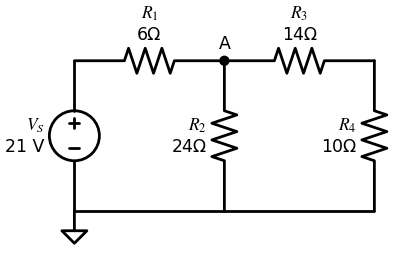

In [5]:



with schemdraw.Drawing(file='mesh-toy-problem.svg') as d:
    d += (Vs := elm.SourceV().up().label('$V_S$\n21 V'))
    d += (R1 := elm.Resistor().right().label('$R_1$\n6Ω'))
    d += (R3 := elm.Resistor().right().label('$R_3$\n14Ω'))
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_2$\n24Ω'))
    d += (R4 := elm.Resistor().at(R3.end).down().label('$R_4$\n10Ω'))
    d += elm.Line().left().tox(R1.start)
    d += elm.GroundSignal()
    d += (nodeA := elm.Dot().at(R1.end).label('A',loc='top'))

```{figure} mesh-toy-problem.svg
---
height: 300px
name: mesh-toy-problem
---
```

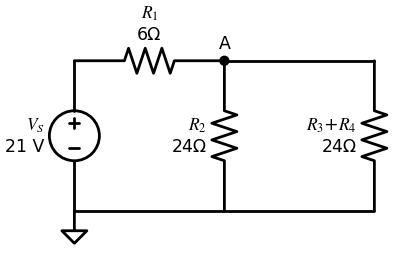

In [6]:



with schemdraw.Drawing(file='mesh-toy-problem-step1.svg') as d:
    d += (Vs := elm.SourceV().up().label('$V_S$\n21 V'))
    d += (R1 := elm.Resistor().right().label('$R_1$\n6Ω'))
    d += (R3 := elm.Line().right())
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_2$\n24Ω'))
    d += (R4 := elm.Resistor().at(R3.end).down().label('$R_3$+$R_4$\n24Ω'))
    d += elm.Line().left().tox(R1.start)
    d += elm.GroundSignal()
    d += (nodeA := elm.Dot().at(R1.end).label('A',loc='top'))

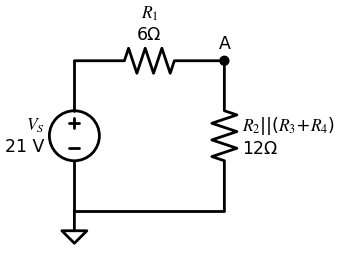

In [7]:



with schemdraw.Drawing(file='mesh-toy-problem-step2.svg') as d:
    d += (Vs := elm.SourceV().up().label('$V_S$\n21 V'))
    d += (R1 := elm.Resistor().right().label('$R_1$\n6Ω'))
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_2$||($R_3$+$R_4$)\n12Ω',loc='bottom'))
    d += elm.Line().left().tox(R1.start)
    d += elm.GroundSignal()
    d += (nodeA := elm.Dot().at(R1.end).label('A',loc='top'))

````{admonition} Seat-of-pants Solution
:class: tip, dropdown
Using previous methods we can find the voltage at node A with respect to ground by reducing the resistor network. Note that $R_3$ and $R_4$ are in series.

```{figure} mesh-toy-problem-step1.svg
---
height: 300px
name: mesh-toy-problem-step1
---
```
Next note that the combination $R_3$+$R_4$ is in parallel with $R_2$. Combining those resistances yields:
```{figure} mesh-toy-problem-step2.svg
---
height: 300px
name: mesh-toy-problem-step2
---
```
Now we must notice that the two resistors are in series with a voltage supply. In this case the voltage divider is used to find $V_A$

$$V_A=V_S\left[\frac{(R_{3}+R_{4})\|R_{2}}{((R_{3}+R_{4})\|R_{2})+R_{1}}\right]=21V\left[\frac{12~\Omega}{12~\Omega+6~\Omega}\right]=14~\text{V}$$

````

Seat of the pants analysis tells us that $V_A$ is 14 V. Let's keep this result in mind for the next few sections

## The Steps

I'm going to list the steps here as reference. Use these steps as we walk through the next example. [A more complete summary is included at the end of the chapter.](subsection-mesh-strategy)

```{index} Super-mesh

```

```{index} Mesh Analysis

```

```{admonition} Steps for Mesh Analysis
1. Assign mesh currents. Identify any "Super-meshes" (We'll discuss what a super-mesh is later).
2. Use KVL on each mesh current.
3. Use Ohm's law to express the resistor voltages in terms of mesh currents.
4. Distribute and group like terms.
5. Plug in values and solve the system.
```

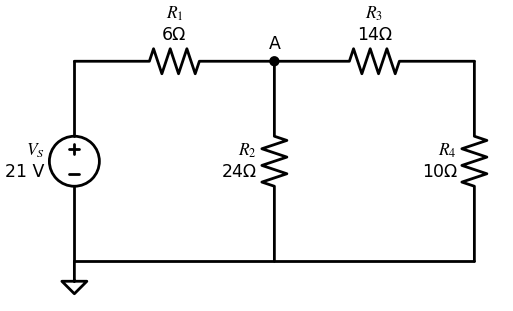

In [8]:



with schemdraw.Drawing(file='mesh-toy-problem-mesh.svg') as d:
    d.config(unit=4)
    d += (Vs := elm.SourceV().up().label('$V_S$\n21 V'))
    d += (R1 := elm.Resistor().right().label('$R_1$\n6Ω'))
    d += (R3 := elm.Resistor().right().label('$R_3$\n14Ω'))
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_2$\n24Ω'))
    d += (R4 := elm.Resistor().at(R3.end).down().label('$R_4$\n10Ω'))
    d += (LineB := elm.Line().left().tox(R1.start))
    d += elm.GroundSignal()
    d += (nodeA := elm.Dot().at(R1.end).label('A',loc='top'))

Let's apply these steps to our toy problem.

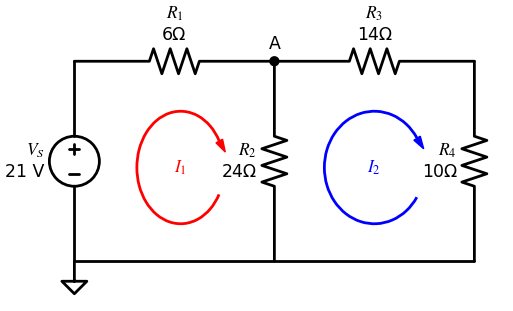

In [9]:



with schemdraw.Drawing(file='mesh-toy-problem-mesh1.svg') as d:
    d.config(unit=4)
    d += (Vs := elm.SourceV().up().label('$V_S$\n21 V'))
    d += (R1 := elm.Resistor().right().label('$R_1$\n6Ω'))
    d += (R3 := elm.Resistor().right().label('$R_3$\n14Ω'))
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_2$\n24Ω'))
    d += (R4 := elm.Resistor().at(R3.end).down().label('$R_4$\n10Ω'))
    d += (LineB := elm.Line().left().tox(R1.start))
    d += elm.GroundSignal()
    d += (nodeA := elm.Dot().at(R1.end).label('A',loc='top'))
    d += elm.LoopCurrent([R1,R2,LineB,Vs],pad=.75).label('$I_1$').color('red')
    d += elm.LoopCurrent([R3,R4,LineB,R2],pad=.75).label('$I_2$').color('blue')

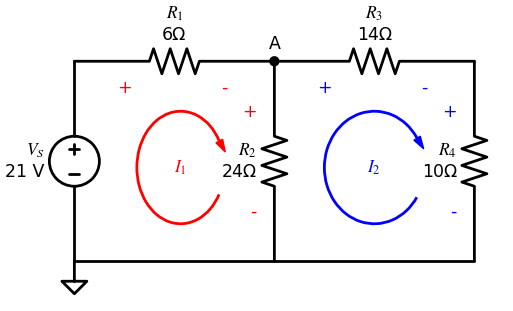

In [10]:



with schemdraw.Drawing(file='mesh-toy-problem-mesh2.svg') as d:
    d.config(unit=4)
    d += (Vs := elm.SourceV().up().label('$V_S$\n21 V'))
    d += (R1 := elm.Resistor().right().label('$R_1$\n6Ω').label(('+','','-'),loc='bottom',color='red'))
    d += (R3 := elm.Resistor().right().label('$R_3$\n14Ω').label(('+','','-'),loc='bottom',color='blue'))
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_2$\n24Ω').label(('+','','-'),loc='top',color='red'))
    d += (R4 := elm.Resistor().at(R3.end).down().label('$R_4$\n10Ω').label(('+','','-'),loc='top',color='blue'))
    d += (LineB := elm.Line().left().tox(R1.start))
    d += elm.GroundSignal()
    d += (nodeA := elm.Dot().at(R1.end).label('A',loc='top'))
    d += elm.LoopCurrent([R1,R2,LineB,Vs],pad=.75).label('$I_1$').color('red')
    d += elm.LoopCurrent([R3,R4,LineB,R2],pad=.75).label('$I_2$').color('blue')

```{index} Super-mesh

```

`````{admonition} Example
Find $V_A$ in this circuit.

````{figure} mesh-toy-problem-mesh.svg
---
height: 300px
name: mesh-toy-problem-mesh
---
````


````{admonition} Solution using Mesh Analysis
:class: tip, dropdown
Step 1 states that we should assign mesh currents. First we identify the two meshes in this circuits. There are no super-meshes in this circuit. We'll see what that means as the examples in this section progress. Each mesh gets a current direction assigned to it, clockwise or counter-clockwise. Direction doesn't matter for now, you get to pick. If the current is actually flowing the opposite direction your answer will have a negative sign. Let's start with both mesh currents flowing in the clockwise (CW) direction.

```{figure} mesh-toy-problem-mesh1.svg
---
height: 300px
name: mesh-toy-problem-mesh1
---
```


In Step 2 we use KVL on each mesh. I find it useful to mark each resistor with the polarity corresponding to the mesh I'm currently working on. It is possible, as we see here with $R_2$, that a resistor will have the opposite polarity when considering the first mesh than it will when considering the second mesh. We can mark the polarities with the mesh with the corresponding current. Passive sign convention should be observed to label the polarities correctly for the **passive** (resistors here) components.  The voltage supply is active and therefore its polarity is unaffected by our choice of mesh current direction.

```{figure} mesh-toy-problem-mesh2.svg
---
height: 300px
name: mesh-toy-problem-mesh2
---
```


Following the colors of the mesh currents in the schematics the two KVL equations are
\begin{eqnarray*}\color{red}
V_S-V_{R1}-V_{R2}=0\\
\color{blue}
-V_{R2}-V_{R3}-V_{R4}=0
\end{eqnarray*}

Step 3 calls for the resistor voltages to be replaced using Ohm's law. Given the mesh currents and the resistances we can express 3 of the voltages this way:
\begin{eqnarray*}
V_{R1}&=&I_1R_1\\
V_{R3}&=&I_2R_3\\
V_{R4}&=&I_2R_4\\
\end{eqnarray*}

The three resistors listed above only have a single mesh current flowing through them. The final voltage drop is that across $R_2$. Since this voltage appears in both meshes it is important to keep the positive current direction correct as each individual KVL equation is considered. When writing the equation for the first mesh $I_1$ indicates the positive current direction. Likewise, when writing the equation for the second mesh $I_2$ indicates the positive current direction. We must then write $V_{R2}$ differently for each KVL as we see here:
\begin{eqnarray*}\color{red}
V_{R2}=(I_1-I_2)R_2\\
\color{blue}
V_{R2}=(-I_1+I_2)R_2\\
\end{eqnarray*}
All of the necessary voltages are now expressed in terms of the unknown mesh currents, $I_1$ and $I_2$. Substituting these into the KVL equations taking care to preserve the signs of each term yields:
\begin{eqnarray*}\color{red}
V_S-I_1R_1-(I_1-I_2)R_2=0\\
\color{blue}
-(-I_1+I_2)R_2-I_2R_3-I_2R_4=0
\end{eqnarray*}
Step 4 calls for a bit of algebra practice.  Distributing where appropriate yields:
\begin{eqnarray*}\color{red}
V_S-I_1R_1-I_1R_2+I_2R_2=0\\
\color{blue}
I_1R_2-I_2R_2-I_2R_3-I_2R_4=0
\end{eqnarray*}
Collecting terms gives us:
\begin{eqnarray*}\color{red}
V_S-I_1(R_1+R_2)+I_2R_2=0\\
\color{blue}
I_1R_2+I_2(-R_2-R_3-R_4)=0
\end{eqnarray*}
Rearranging this to look like the linear systems reviewed in Section \ref{sec*linearSystems}
\begin{eqnarray*}\color{red}
(R_1+R_2)I_1-R_2I_2=V_S\\
\color{blue}
R_2I_1+(-R_2-R_3-R_4)I_2=0
\end{eqnarray*}
Which leads us to Step 5, plugin values and solve the system.
\begin{eqnarray*}\color{red}
(6~\Omega+24~\Omega)I_1-24~\Omega I_2=21~\text{V}\\
\color{blue}
24~\Omega I_1+(-24~\Omega-14~\Omega-10~\Omega)I_2=0~\text{V}
\end{eqnarray*}
or
\begin{eqnarray*}\color{red}
30~\Omega I_1-24~\Omega I_2=21~\text{V}\\
\color{blue}
24~\Omega I_1-48~\Omega I_2=0~\text{V}
\end{eqnarray*}
In matrix form this looks like

$$\left[ \begin{array}{cc}
30~\Omega&-24~\Omega\\
24~\Omega&-48~\Omega\\
\end{array} \right]\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}21~\text{V}\\0~\text{V}\end{array}\right]$$
and solving for the currents gives us

$$\left[ \begin{array}{cc}
30~\Omega&-24~\Omega\\
24~\Omega&-48~\Omega\\
\end{array} \right]^{-1}\left[\begin{array}{c}21~\text{V}\\0~\text{V}\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}1.167~\text{A}\\583.3~\text{mA}\end{array}\right]$$

Even after all of this we still haven't found what we were asked to, $V_A$. We can do that using the expression for $V_{R2}$ discussed in this example, but which one? $V_A$ is the voltage at node A with reference to ground. Following the passive sign convention in this case the positive current direction is down through the resistor. Therefore, the voltage, $V_A$ is found with

$$V_A=(I_1-I_2)R_2=(1.167~\text{A}-583.3~\text{mA})24~\Omega=14~\text{V}$$
````
`````

Why on earth would we go through all of that when we have already solved this problem in a simpler manner?

1. These steps can be applied in general. The seat-of-the-pants method depended on your clever mind to find a path to the answer. As circuits become more complex finding that path can become more convoluted and therefore more prone to error.
2. Until now we have been limited to analyzing circuits with a single source. Mesh analysis can be applied regardless of the number of sources in the circuit.
3. Once you have calculated the mesh currents you can easily revisit the circuit and find any value of interest.

Consider the next example that uses the same circuit. If we were later asked to analyze the circuit for$V_B$ we may have to perform the analysis again with a different goal. Using the previously calculated mesh currents it is a trivial matter to find the value.

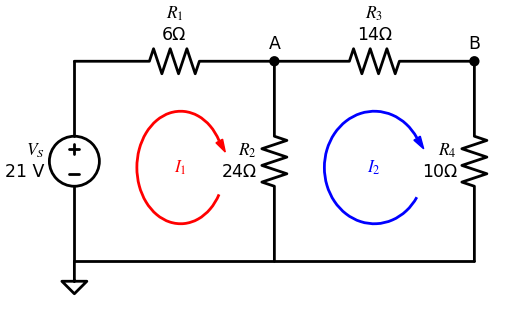

In [11]:



with schemdraw.Drawing(file='mesh-toy-problem-other-value.svg') as d:
    d.config(unit=4)
    d += (Vs := elm.SourceV().up().label('$V_S$\n21 V'))
    d += (R1 := elm.Resistor().right().label('$R_1$\n6Ω'))
    d += (R3 := elm.Resistor().right().label('$R_3$\n14Ω'))
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_2$\n24Ω'))
    d += (R4 := elm.Resistor().at(R3.end).down().label('$R_4$\n10Ω'))
    d += (LineB := elm.Line().left().tox(R1.start))
    d += elm.GroundSignal()
    d += (nodeA := elm.Dot().at(R1.end).label('A',loc='top'))
    d += (nodeB := elm.Dot().at(R3.end).label('B',loc='top'))
    d += elm.LoopCurrent([R1,R2,LineB,Vs],pad=.75).label('$I_1$').color('red')
    d += elm.LoopCurrent([R3,R4,LineB,R2],pad=.75).label('$I_2$').color('blue')

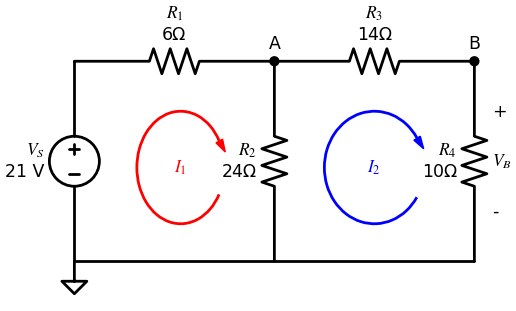

In [12]:



with schemdraw.Drawing(file='mesh-toy-problem-other-value-solution.svg') as d:
    d.config(unit=4)
    d += (Vs := elm.SourceV().up().label('$V_S$\n21 V'))
    d += (R1 := elm.Resistor().right().label('$R_1$\n6Ω'))
    d += (R3 := elm.Resistor().right().label('$R_3$\n14Ω'))
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_2$\n24Ω'))
    d += (R4 := elm.Resistor().at(R3.end).down().label('$R_4$\n10Ω').label(('+','$V_B$','-'),loc='bottom'))
    d += (LineB := elm.Line().left().tox(R1.start))
    d += elm.GroundSignal()
    d += (nodeA := elm.Dot().at(R1.end).label('A',loc='top'))
    d += (nodeB := elm.Dot().at(R3.end).label('B',loc='top'))
    d += elm.LoopCurrent([R1,R2,LineB,Vs],pad=.75).label('$I_1$').color('red')
    d += elm.LoopCurrent([R3,R4,LineB,R2],pad=.75).label('$I_2$').color('blue')

`````{admonition} Example
Find $V_B$ given $I_1$=1.167 A and $I_2$=583.3 mA.
```{figure} mesh-toy-problem-other-value.svg
---
height: 300px
name: mesh-toy-problem-other-value
---
```
````{admonition} Solution
:class: tip, dropdown
We can see from the diagram that $V_B$ is equivalent to the voltage across $R_4$.
```{figure} mesh-toy-problem-other-value-solution.svg
---
height: 300px
name: mesh-toy-problem-other-value-solution
---
```
Furthermore, we can see that $I_2$ flows in the positive direction according to the passive sign convention. Therefore,$V_B$ is simply

$$V_B=I_2R_4=(583.3~\text{mA})(10~\Omega)=5.833\text{V}$$
````
`````

## Mesh Analysis with Multiple Sources

I mentioned before that mesh analysis can be used to analyze circuits with multiple sources. The same steps are applied with no alteration. Let's look at a quick example

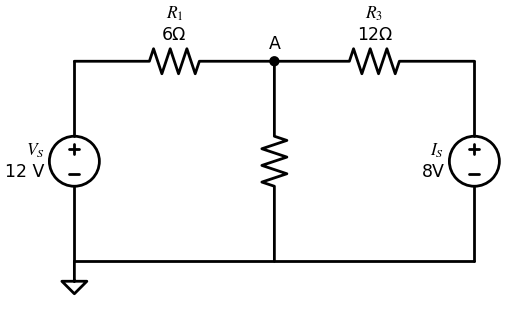

In [13]:



with schemdraw.Drawing(file='mesh-multiple-sources.svg') as d:
    d.config(unit=4)
    d += (Vs := elm.SourceV().up().label('$V_S$\n12 V'))
    d += (R1 := elm.Resistor().right().label('$R_1$\n6Ω'))
    d += (R3 := elm.Resistor().right().label('$R_3$\n12Ω'))
    d += (R2 := elm.Resistor().at(R1.end).down())
    d += (R4 := elm.SourceV().at(R3.end).down().label('$I_S$\n8V').reverse())
    d += elm.Line().left().tox(R1.start)
    d += elm.GroundSignal()
    d += (nodeA := elm.Dot().at(R1.end).label('A',loc='top'))

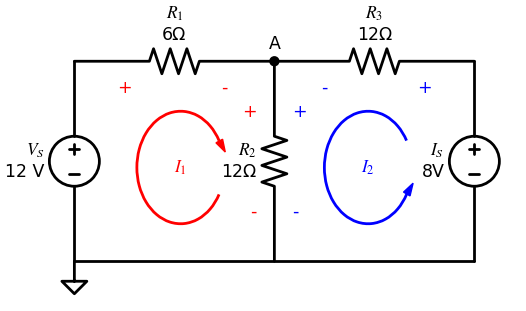

In [14]:



with schemdraw.Drawing(file='mesh-multiple-sources-annotated.svg') as d:
    d.config(unit=4)
    d += (Vs := elm.SourceV().up().label('$V_S$\n12 V'))
    d += (R1 := elm.Resistor().right().label('$R_1$\n6Ω').label(('+','','-'),loc='bottom',color='red'))
    d += (R3 := elm.Resistor().right().label('$R_3$\n12Ω').label(('-','','+'),loc='bottom',color='blue'))
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_2$\n12Ω').label(('+','','-'),loc='top',color='red').label(('+','','-'),loc='bottom',color='blue'))
    d += (R4 := elm.SourceV().at(R3.end).down().label('$I_S$\n8V').reverse())
    d += elm.Line().left().tox(R1.start)
    d += elm.GroundSignal()
    d += (nodeA := elm.Dot().at(R1.end).label('A',loc='top'))
    d += elm.LoopCurrent([R1,R2,LineB,Vs],pad=.75).label('$I_1$').color('red')
    d += elm.LoopCurrent([R3,R4,LineB,R2],pad=.75,direction='ccw').label('$I_2$').color('blue')

``````{admonition} Example
Find $V_A$
```{figure} mesh-multiple-sources.svg
---
height: 300px
name: mesh-multiple-sources
---
```
`````{admonition} Solution
:class: tip, dropdown
Let's start by annotating the schematic with mesh currents and passive polarities. Notice that here the first mesh current is flowing CW and the second is flowing counter-clockwise (CCW).  I have a sick sense of fun.
````{figure} mesh-multiple-sources-annotated.svg
---
height: 300px
name: mesh-multiple-sources-annotated
---
````
Because of the current directions, the currents through $R_2$ are flowing in the same direction and therefore the polarities are identical. This will result in $V_{R2}$ having the same sign regardless of which mesh is being analyzed.

The KVL equations (step 2) are
\begin{eqnarray*}\color{red}
V_{S1}-V_{R1}-V_{R2}=0\\
\color{blue}
V_{S2}-V_{R2}-V_{R3}=0
\end{eqnarray*}
Using Ohm's Law (step 3) gives us:
\begin{eqnarray*}\color{red}
V_{S1}-I_1R_1-(I_1+I_2)R_2=0\\
\color{blue}
V_{S2}-(I_1+I_2)R_2-I_2R_3=0
\end{eqnarray*}
Distributing and grouping terms as prescribed in Step 4 results in
\begin{eqnarray*}\color{red}
(R_1+R_2)I_1+R_2I_2=V_{S1}\\
\color{blue}
R_2I_1+(R_2+R_3)I_2=V_{S2}
\end{eqnarray*}
and after substituting values
\begin{eqnarray*}\color{red}
18\Omega I_1+12\Omega I_2=12~\text{V}\\
\color{blue}
12\Omega I_1+24\Omega I_2=8~\text{V}
\end{eqnarray*}
Solving this linear system using matrices gives us the two mesh currents

$$\left[ \begin{array}{cc}
18\Omega&12\Omega\\
12\Omega&24\Omega\\
\end{array} \right]^{-1}\left[\begin{array}{c}12V\\8V\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}2/3~\text{A}\\0~\text{A}\end{array}\right]$$

Finally solving for $V_A$

$$V_A=(I_1+I_2)R_2=(2/3~\text{A})(12\Omega)=8~\text{V}$$

Again, $I_1$ and $I_2$ have a positive direction that agrees with the polarity of $V_A$ as dictated by the passive sign convention. This can be seen mathematically in the equation directly above in the signs of the two currents, both positive.
````
``````

A quick side note: Ohm's law can be seen if we examine the contents of the linear system in matrix form. The 2x2 matrix contains only resistances. The vector of unknowns contains currents. The vector of constants contains voltages. Considering that the matrix is inverted we can see that

$$
\underbrace{\left[ \begin{array}{cc}
18\Omega&12\Omega\\
12\Omega&24\Omega\\
\end{array} \right]^{-1}}_{\boldsymbol{R}^{-1}}\underbrace{\left[\begin{array}{c}12~\text{V}\\8~\text{V}\end{array}\right]}_{\boldsymbol{V}}=\underbrace{\left[\begin{array}{c}I_1\\I_2\end{array}\right]}_{\boldsymbol{I}}=\left[\begin{array}{c}2/3~\text{A}\\0~\text{A}\end{array}\right]
$$

or simply a matrix form of Ohm's Law

$$\boldsymbol{VR}^{-1}=\frac{\boldsymbol{V}}{\boldsymbol{R}}=\boldsymbol{I}$$

More complex circuits might have additional meshes. Mesh analysis can be applied in these cases simply by adding additional mesh currents and additional corresponding KVL equations.

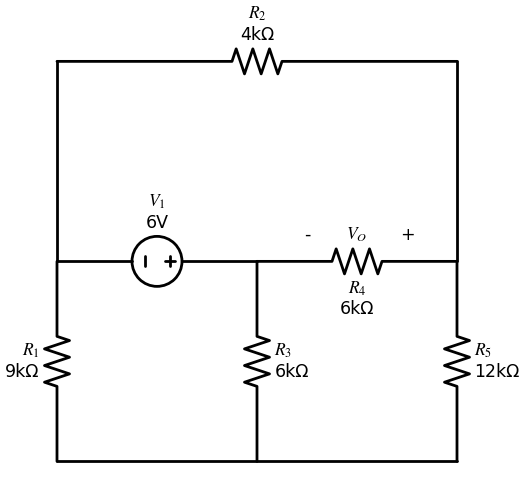

In [15]:



with schemdraw.Drawing(file='mesh-3-meshes.svg') as d:
    d.config(unit=4)
    d += (R1 := elm.Resistor().up().label('$R_1$\n9kΩ'))
    d += (V1 := elm.SourceV().right().label('$V_1$\n6V'))
    d += (R4 := elm.Resistor().right().label('$R_4$\n6kΩ',loc='bottom').label(('-','','+'),loc='top',color='black').label(('','$V_O$',''),loc='top',color='black'))
    d += (R5 := elm.Resistor().down().label('$R_5$\n12kΩ',loc='bottom'))
    d += (LineB := elm.Line().left().tox(V1.start))
    d += (R3 := elm.Resistor().at(V1.end).down().label('$R_3$\n6kΩ',loc='bottom'))
    d += (LineL := elm.Line().at(V1.start).up().length(4))
    d += (R2 := elm.Resistor().right().tox(R4.end).label('$R_2$\n4kΩ'))
    d += (LineR := elm.Line().down().length(4))

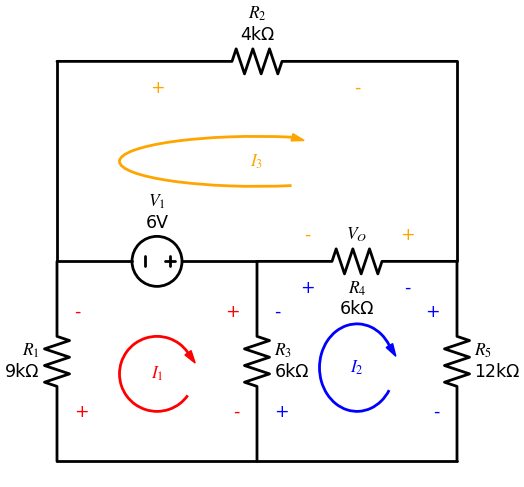

In [16]:



with schemdraw.Drawing(file='mesh-3-meshes-annotated.svg') as d:
    d.config(unit=4)
    d += (R1 := elm.Resistor().up().label('$R_1$\n9kΩ').label(('+','','-'),loc='bottom',color='red'))
    d += (V1 := elm.SourceV().right().label('$V_1$\n6V'))
    d += (R4 := elm.Resistor().right().label('$R_4$\n6kΩ',loc='bottom').label(('+','','-'),loc='bottom',color='blue').label(('-','','+'),loc='top',color='orange').label(('','$V_O$',''),loc='top',color='black'))
    d += (R5 := elm.Resistor().down().label('$R_5$\n12kΩ',loc='bottom').label(('+','','-'),loc='top',color='blue'))
    d += (LineB := elm.Line().left().tox(V1.start))
    d += (R3 := elm.Resistor().at(V1.end).down().label('$R_3$\n6kΩ',loc='bottom').label(('+','','-'),loc='top',color='red').label(('-','','+'),loc='bottom',color='blue'))
    d += (LineL := elm.Line().at(V1.start).up().length(4))
    d += (R2 := elm.Resistor().right().tox(R4.end).label('$R_2$\n4kΩ').label(('+','','-'),loc='bottom',color='orange'))
    d += (LineR := elm.Line().down().length(4))
    d += elm.LoopCurrent([V1,R3,LineB,R1],pad=1).label('$I_1$').color('red')
    d += elm.LoopCurrent([R4,R5,LineB,R3],pad=1).label('$I_2$').color('blue')
    d += elm.LoopCurrent([R2,LineR,R4,LineL],pad=1.25).label('$I_3$').color('orange')

`````{admonition} Example
Find $V_O$
````{figure} mesh-3-meshes.svg
---
height: 300px
name: mesh-3-meshes
---
````
````{admonition} Solution
:class: tip, dropdown
```{figure} mesh-3-meshes-annotated.svg
---
height: 300px
name: mesh-3-meshes-annotated
---
```
**KVL Equations:**
\begin{eqnarray*}\color{red}
-V_{R1}+V_1-V_{R3}=0\\
\color{blue}
-V_{R3}-V_{R4}-V_{R5}=0\\
\color{orange}
-V_{R2}-V_{R4}-V_1=0
\end{eqnarray*}
**Substituting with Ohm's Law**
\begin{eqnarray*}\color{red}
-I_1R_1+V_1-(I_1-I_2)R_3=0\\
\color{blue}
-(I_2-I_1)R_3-(I_2-I_3)R_4-I_2R_5=0\\
\color{orange}
-I_3R_2-(I_3-I_2)R_4-V_1=0
\end{eqnarray*}
**Grouping Like-terms**
\begin{eqnarray*}\color{red}
(-R_1-R_3)I_1+R_3I_2=-V_1\\
\color{blue}
R_3I_1+(-R_3-R_4-R_5)I_2+R_4I_3=0\\
\color{orange}
R_4I_2+(-R_2-R_4)I_3=V_1
\end{eqnarray*}
**Substituting and Solving**
\begin{eqnarray*}\color{red}
-15k\Omega I_1+6k\Omega I_2=-6~\text{V}\\
\color{blue}
6k\Omega I_1-24k\Omega I_2+6k\Omega I_3=0\\
\color{orange}
6k\Omega I_2-10k\Omega I_3=6~\text{V}
\end{eqnarray*}
**Solve using matrices:**

$$\left[ \begin{array}{ccc}
-15~\text{k}\Omega&6~\text{k}\Omega&0~\Omega\\
6~\text{k}\Omega&-24~\text{k}\Omega&6~\text{k}\Omega\\
0~\Omega&6~\text{k}\Omega&-10~\text{k}\Omega\\
\end{array} \right]^{-1}\left[\begin{array}{c}-6~\text{V}\\0~\text{V}\\6~\text{V}\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\\I_3\end{array}\right]=\left[\begin{array}{c}373.33~\mu\text{A}\\-66.67~\mu\text{A}\\-640.00~\mu\text{A}\end{array}\right]$$

**Finally solving for $V_{O}$**

$$V_O=(I_3-I_2)R_4=(-640.00~\mu\text{A}+66.67~\mu\text{A})6~\text{k}\Omega=-3.44\text{V}$$



````
`````

## Current Sources in Mesh Analysis

KVL equations are the default when performing Mesh analysis. There are cases where you are unable to write enough KVL equations to form a fully-determined system of equations. Those cases can be easily recognized if we look for current supplies.

Each term in a KVL must be a voltage. Those voltages must be rewritten to be in terms of the unknown mesh currents. This is possible with resistors using Ohm's law. When current supplies are present we cannot readily represent the voltage across that current supply in terms of the unknown mesh currents. So how do we approach current supplies when performing Mesh analysis?

Since we cannot write a KVL for a mesh when it contains a current supply, we must write a KCL instead. The goal remains to write the same number of equations as we have unknowns in order to find a unique solution for those unknowns. So, for each current supply (dependent or independent) we write a KCL. The remainder of the equations we need to equal the number of unknowns are then KVL equations written in the usual way.

Let's examine two cases of circuits that have current supplies and perform Mesh analysis on them.

### Current Sources with a Single Mesh Current

The first case is a current supply that is only affected by a single mesh current. But before we write the KCL for that current supply consider the types and quantities of equations that you will write to find the unknown mesh currents. For each current supply write a KCL equation, only one in the case if the next example. A total of 2 equations are required since we have two unknown mesh currents. That leaves 1 KVL to have a fully-determined system.

Let's find the mesh currents in this example circuit:

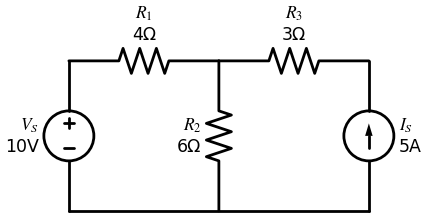

In [17]:



with schemdraw.Drawing(file='mesh-current-supply.svg') as d:
    d += (V1 := elm.SourceV().up().label('$V_S$\n10V'))
    d += (R1 := elm.Resistor().right().label('$R_1$\n4Ω'))
    d += (R3 := elm.Resistor().right().label('$R_3$\n3Ω'))
    d += (Is := elm.SourceI().down().label('$I_S$\n5A',loc='bottom').reverse())
    d += (LineB := elm.Line().left().tox(R1.start))
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_2$\n6Ω'))

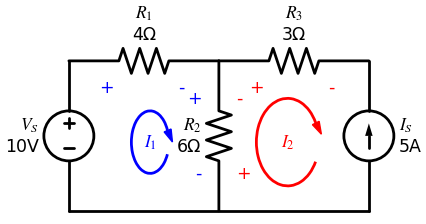

In [18]:



with schemdraw.Drawing(file='mesh-current-supply-annotated.svg') as d:
    d += (V1 := elm.SourceV().up().label('$V_S$\n10V'))
    d += (R1 := elm.Resistor().right().label('$R_1$\n4Ω').label(('+','','-'),loc='bottom',color='blue'))
    d += (R3 := elm.Resistor().right().label('$R_3$\n3Ω').label(('+','','-'),loc='bottom',color='red'))
    d += (Is := elm.SourceI().down().label('$I_S$\n5A',loc='bottom').reverse())
    d += (LineB := elm.Line().left().tox(R1.start))
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_2$\n6Ω').label(('+','','-'),loc='top',color='blue').label(('-','','+'),loc='bottom',color='red'))
    d += elm.LoopCurrent([R1,R2,LineB,Vs],pad=0.75).label('$I_1$').color('blue')
    d += elm.LoopCurrent([R3,Is,LineB,R2],pad=0.5).label('$I_2$').color('red')

`````{admonition} Example
Find the mesh currents in this circuit

````{figure} mesh-current-supply.svg
---
height: 300px
name: mesh-current-supply
---
````

````{admonition} Solution
:class: tip, dropdown
Before we begin the analysis let's summarize what equations we'll be writing:

$$1\text{ KCL}+1\text{ KVL}=2\text{ Unknowns}$$

Now let's follow the steps.
Label Mesh currents and polarities of passive components:
```{figure} mesh-current-supply-annotated.svg
---
height: 300px
name: mesh-current-supply-annotated
---
```
Now let's set about writing the equations. Let's consider which mesh currents flow through the current supply in order to write the KCL equation. In this case the 5A supply is only part of the second mesh and therefore is only affected by $I_2$. The direction of the mesh current must also be considered. Since $I_2$ opposes the direction of the 5A supply (they flow in opposite directions) one will be the negative of the other. We describe this as:

$$\color{red} I_2=-5~\text{A}$$

or its mathematical equivalent:

$$\color{red} -I_2=5~\text{A}\color{black}$$

Either of these is suitable to be included in the system of equations that describe this circuit.

The second equation is a KVL. The only suitable mesh for a KVL equation is the left mesh ($I_1$).

\begin{eqnarray*}\color{blue}
\color{red} V_S-V_{R1}-V_{R2}=0\\
\color{red} V_{R1}+V_{R2}=V_S\\
\color{red} I_1R_1+(I_1-I_2)R_2=V_S\\
\color{red} (R_1+R_2)I_1-R_2I_2=V_S
\end{eqnarray*}

The last equation in the sequence above is suitable for inclusion in the system of equations that describe this circuit.  Substituting the values in gives us:

\begin{eqnarray*}\color{blue}
10~\Omega I_1-6~\Omega I_2=10~\text{V}\\
\color{red}
-I_2=5~\text{A}\\
\end{eqnarray*}
Solve using matrices to find the mesh currents:

$$\left[ \begin{array}{cc}
10&-6\\
0&-1\\
\end{array} \right]^{-1}\left[\begin{array}{c}10\\5\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}-2~\text{A}\\-5~\text{A}\end{array}\right]$$
````
`````

### Current Sources with Multiple Mesh Currents

The case of current supplies that are affected by multiple mesh currents varies only slightly from the previous example where a current supply is affected by a single mesh current. We still write a KCL for this current supply. The change comes while writing the KVL. Neither of the individual meshes will allow you to write a KVL in terms of the unknown mesh currents since both meshes contain the current supply. Therefore you will have to write the KVL around the two meshes taken together. Recall that Kirchhoff stated that the algebraic sum of voltages around a **loop** is zero. The path around the two meshes taken together is a loop and the voltages will sum to zero.

Let's look at an example.

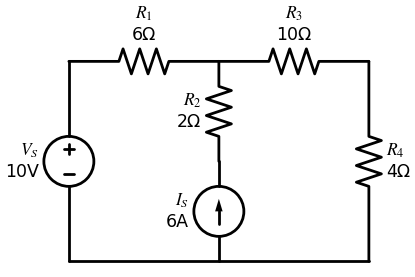

In [19]:



with schemdraw.Drawing(file='mesh-super.svg') as d:
    d += (V1 := elm.SourceV().up().label('$V_S$\n10V').length(4))
    d += (R1 := elm.Resistor().right().label('$R_1$\n6Ω'))
    d += (R3 := elm.Resistor().right().label('$R_3$\n10Ω'))
    d += (R4 := elm.Resistor().down().label('$R_4$\n4Ω',loc='bottom').length(4))
    d += (LineB := elm.Line().left().tox(R1.start))
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_2$\n2Ω').length(2))
    d += (Is := elm.SourceI().down().label('$I_S$\n6A').length(2).reverse())

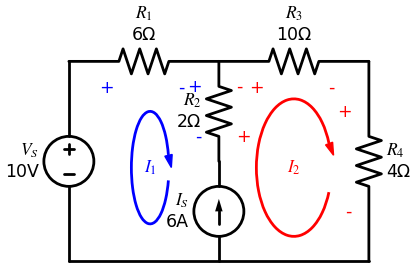

In [20]:



with schemdraw.Drawing(file='mesh-super-annotated.svg') as d:
    d += (V1 := elm.SourceV().up().label('$V_S$\n10V').length(4))
    d += (R1 := elm.Resistor().right().label('$R_1$\n6Ω').label(('+','','-'),loc='bottom',color='blue'))
    d += (R3 := elm.Resistor().right().label('$R_3$\n10Ω').label(('+','','-'),loc='bottom',color='red'))
    d += (R4 := elm.Resistor().down().label('$R_4$\n4Ω',loc='bottom').label(('+','','-'),loc='top',color='red').length(4))
    d += (LineB := elm.Line().left().tox(R1.start))
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_2$\n2Ω').label(('+','','-'),loc='top',color='blue').label(('-','','+'),loc='bottom',color='red').length(2))
    d += (Is := elm.SourceI().down().label('$I_S$\n6A').length(2).reverse())
    d += elm.LoopCurrent([R1,R2,LineB,Vs],pad=0.75).label('$I_1$').color('blue')
    d += elm.LoopCurrent([R3,R4,LineB,R2],pad=0.5).label('$I_2$').color('red')

`````{admonition} Example
Determine the mesh currents.
```{figure} mesh-super.svg
---
height: 300px
name: mesh-super
---
```

````{admonition} Solution
:class: tip, dropdown
Considering the number and types of equations to be written given the one current supply and two meshes:

$$1\text{ KCL}+1\text{ KVL}=2\text{ Unknowns}$$

Let's start by labeling the mesh currents and polarities for the passive circuit elements

```{figure} mesh-super-annotated.svg
---
height: 300px
name: mesh-super-annotated
---
```

Two meshes contain the current supply, $I_1$ and $I_2$. We consider each in turn with respect to the current direction. $I_1$ flows against the supply and will therefore will be negative. $I_2$ flows with the current supply and therefore will be positive.

$$-I_1+I_2=6\text{A}$$

The KVL is then written using the loop around both meshes

\begin{eqnarray*}
V_S-V_{R1}-V_{R3}-V_{R4}=0\\
V_S-I_1R_1-I_2R_3-I_2R_4=0\\
-R_1I_1-R_3I_2-R_4I_2=-V_S\\
-R_1I_1+(-R_3-R_4)I_2=-V_S\\
\end{eqnarray*}

Plug in values:

\begin{eqnarray*}
-6I_1-14I_2=-20~\text{V}\\
\end{eqnarray*}

Solve using matrices:

$$\left[ \begin{array}{cc}
-1&1\\
-6&-14\\
\end{array} \right]^{-1}\left[\begin{array}{c}6\\-20\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}-3.2~\text{A}\\2.8~\text{A}\end{array}\right]$$
````
`````

Let's consider another example. In the previous example the KVL was written around the outside of the circuit. This may not always be possible. It is a better habit to write the KVL around the two meshes that are shared by the current supply as we will for the following example:

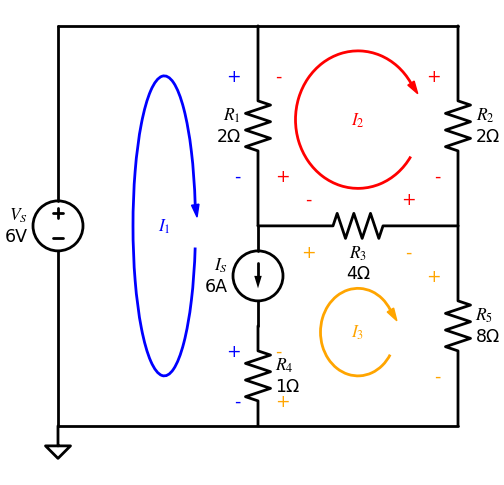

In [21]:



with schemdraw.Drawing(file='mesh-super-3.svg') as d:
    d.config(unit=4)
    d += (V1 := elm.SourceV().up().label('$V_S$\n6V').length(8))
    d += (LineT1 := elm.Line().right().length(4))
    d += (LineT2 := elm.Line().right().length(4))
    d += (R2 := elm.Resistor().down().label('$R_2$\n2Ω',loc='bottom').label(('+','','-'),loc='top',color='red'))
    d += (R5 := elm.Resistor().down().length(4).label('$R_5$\n8Ω',loc='bottom').label(('+','','-'),loc='top',color='orange'))
    d += (LineB := elm.Line().left().length(8))
    d += (GndSig := elm.GroundSignal())
    d += (R1 := elm.Resistor().at(LineT1.end).down().label('$R_1$\n2Ω',loc='top').label(('+','','-'),loc='top',color='blue').label(('-','','+'),loc='bottom',color='red'))
    d += (Is := elm.SourceI().down().length(2).label('$I_S$\n6A',loc='top'))
    d += (R4 := elm.Resistor().down().length(2).label('$R_4$\n1Ω',loc='bottom').label(('+','','-'),loc='top',color='blue').label(('-','','+'),loc='bottom',color='orange'))
    d += (R3 := elm.Resistor().at(R1.end).right().label('$R_3$\n4Ω',loc='bottom').label(('-','','+'),loc='top',color='red').label(('+','','-'),loc='bottom',color='orange'))
    d += elm.LoopCurrent([LineT1,R1,LineB,Vs],pad=1).label('$I_1$').color('blue')
    d += elm.LoopCurrent([LineT2,R2,R3,R1],pad=0.5).label('$I_2$').color('red')
    d += elm.LoopCurrent([R3,R5,LineB,R4],pad=1).label('$I_3$').color('orange')

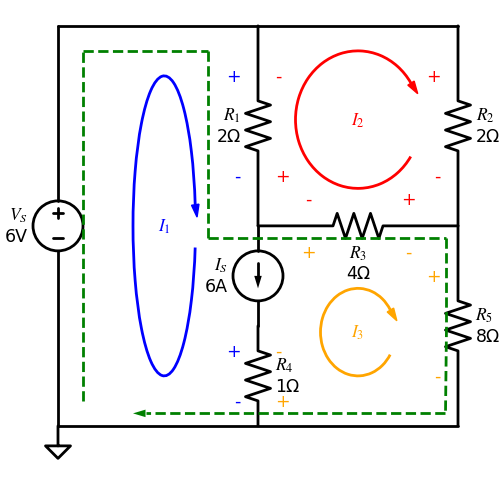

In [22]:



with schemdraw.Drawing(file='mesh-super-3-super-loop.svg') as d:
    d.config(unit=4)
    d += (V1 := elm.SourceV().up().label('$V_S$\n6V').length(8))
    d += (LineT1 := elm.Line().right().length(4))
    d += (LineT2 := elm.Line().right().length(4))
    d += (R2 := elm.Resistor().down().label('$R_2$\n2Ω',loc='bottom').label(('+','','-'),loc='top',color='red'))
    d += (R5 := elm.Resistor().down().length(4).label('$R_5$\n8Ω',loc='bottom').label(('+','','-'),loc='top',color='orange'))
    d += (LineB := elm.Line().left().length(8))
    d += (GndSig := elm.GroundSignal())
    d += (R1 := elm.Resistor().at(LineT1.end).down().label('$R_1$\n2Ω',loc='top').label(('+','','-'),loc='top',color='blue').label(('-','','+'),loc='bottom',color='red'))
    d += (Is := elm.SourceI().down().length(2).label('$I_S$\n6A',loc='top'))
    d += (R4 := elm.Resistor().down().length(2).label('$R_4$\n1Ω',loc='bottom').label(('+','','-'),loc='top',color='blue').label(('-','','+'),loc='bottom',color='orange'))
    d += (R3 := elm.Resistor().at(R1.end).right().label('$R_3$\n4Ω',loc='bottom').label(('-','','+'),loc='top',color='red').label(('+','','-'),loc='bottom',color='orange'))
    d += elm.LoopCurrent([LineT1,R1,LineB,Vs],pad=1).label('$I_1$').color('blue')
    d += elm.LoopCurrent([LineT2,R2,R3,R1],pad=0.5).label('$I_2$').color('red')
    d += elm.LoopCurrent([R3,R5,LineB,R4],pad=1).label('$I_3$').color('orange')


    d += elm.Line().linestyle('--').at(Vs.start,dx=0.5,dy=0.5).up().color('green').toy(7.5)
    d += elm.Line().linestyle('--').right().color('green').tox(3)
    d += elm.Line().linestyle('--').down().color('green').toy(3.75)
    d += elm.Line().linestyle('--').right().color('green').tox(7.75)
    d += elm.Line().linestyle('--').down().color('green').toy(0.25)
    d += elm.Line(arrow='->').linestyle('--').left().color('green').tox(1.5)

`````{admonition} Example
Find the mesh currents.
```{figure} mesh-super-3.svg
---
height: 300px
name: mesh-super-3
---
```
I've already labeled the mesh currents and polarities to save time.




````{admonition} Solution
:class: tip, dropdown
We consider the number and types of equations to be written given the one current supply and three mesh currents

$$1\text{ KCL}+2\text{ KVL}=3\text{ Unknowns}$$

Two meshes contain the current supply, $I_1$ and $I_3$.  Each is considered in turn with respect to the current direction.  $I_1$ flows with the supply and will therefore be positive.  $I_{3}$ flows against the current supply and therefore will be negative.

$$\color{green}I_1-I_3=6~\text{A}$$

The KVL is then written using the loop around both meshes that flow through the current supply.  The path the KVL takes is shown here:
```{figure} mesh-super-3-super-loop.svg
---
height: 300px
name: mesh-super-3-super-loop
---
```

The signs of the terms come from the polarities marked for the two mesh currents that flow through the current supply.

\begin{eqnarray*}
\color{green}V_S-V_{R1}-V_{R3}-V_{R5}=0\\
\color{green}V_S-(I_1-I_2)R_1-(I_3-I_2)R_3-I_3R_5=0\\
\color{green}-R_1I_1+R_1I_2-R_3I_3+R_3I_2-R_5I_3=-V_S\\
\color{green}-R_1I_1+(R_1+R_3)I_2+(-R_3-R_5)I_3=-V_S\\
\end{eqnarray*}

Plug in values:

\begin{eqnarray*}
\color{green}-2I_1+6I_2-12I_3=-6\text{V}\\
\end{eqnarray*}

The other KVL is more typical.  We'll write this one around $I_2$.

\begin{eqnarray*}
\color{red}-R_1(I_2-I_1)-R_2I_2-R_3(I_2-I_3)=0\\
\color{red}-R_1I_2+R_1I_1-R_2I_2-R_3I_2+R_3I_3=0\\
\color{red}R_1I_1+(-R_1-R_2-R_3)I_2+R_3I_3=0\\
\end{eqnarray*}

Plug in values:

\begin{eqnarray*}
\color{red}2I_1-8I_2+4I_3=0\\
\end{eqnarray*}

Solve using matrices:

$$\left[ \begin{array}{ccc}
1&0&-1\\
-2&6&-12\\
2&-8&4\\
\end{array} \right]^{-1}\left[\begin{array}{c}6\\-6\\0\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\\I_3\end{array}\right]=\left[\begin{array}{c}6.316\text{A}\\1.737\text{A}\\315.8\text{mA}\end{array}\right]$$
````
`````

## Mesh Analysis with Dependent Supplies

I often describe dependent supplies as the one component we've covered thus far that I cannot pull out of a draw and put in your hands. Nevertheless, dependent supplies play an important role in analysis of modern electronics. Every transistor is modeled with a dependent supply during analysis. If you have a smart phone in your pocket right now, you have between one billion and two billion dependent supplies with you right now. Maybe you're even using them to read this!

Mesh analysis does not change much from what we have done so far. The only change is the need to write an expression for the control variable of the dependent supply, and then substitute it into the system of equations.

Here's an example

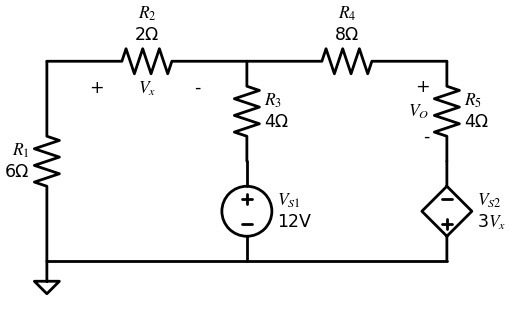

In [23]:



with schemdraw.Drawing(file='mesh-dependent.svg') as d:
    d.config(unit=4)
    d += (R1 := elm.Resistor().up().label('$R_1$\n6Ω'))
    d += (R2 := elm.Resistor().right().label('$R_2$\n2Ω').label(('+','$V_x$','-'),loc='bottom'))
    d += (R4 := elm.Resistor().right().label('$R_4$\n8Ω'))
    d += (R5 := elm.Resistor().down().length(2).label('$R_5$\n4Ω',loc='bottom').label(('+','$V_O$','-'),loc='top'))
    d += (Vs2 := elm.SourceControlledV().down().length(2).label('$V_{S2}$\n3$V_x$',loc='bottom'))
    d += (LineB := elm.Line().left().tox(R1.start))
    d += (GndSig := elm.GroundSignal())
    d += (R3 := elm.Resistor().at(R2.end).down().length(2).label('$R_3$\n4Ω',loc='bottom'))
    d += (Vs2 := elm.SourceV().down().length(2).label('$V_{S1}$\n12V',loc='bottom').reverse())

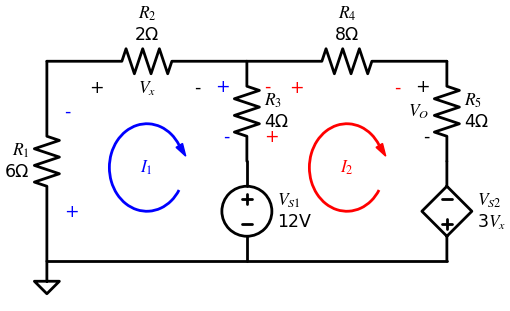

In [24]:



with schemdraw.Drawing(file='mesh-dependent-annotated.svg') as d:
    d.config(unit=4)
    d += (R1 := elm.Resistor().up().label('$R_1$\n6Ω').label(('+','','-'),loc='bottom',color='blue'))
    d += (R2 := elm.Resistor().right().label('$R_2$\n2Ω').label(('+','$V_x$','-'),loc='bottom'))
    d += (R4 := elm.Resistor().right().label('$R_4$\n8Ω').label(('+','','-'),loc='bottom',color='red'))
    d += (R5 := elm.Resistor().down().length(2).label('$R_5$\n4Ω',loc='bottom').label(('+','$V_O$','-'),loc='top'))
    d += (Vs2 := elm.SourceControlledV().down().length(2).label('$V_{S2}$\n3$V_x$',loc='bottom'))
    d += (LineB := elm.Line().left().tox(R1.start))
    d += (GndSig := elm.GroundSignal())
    d += (R3 := elm.Resistor().at(R2.end).down().length(2).label('$R_3$\n4Ω',loc='bottom').label(('+','','-'),loc='top',color='blue').label(('-','','+'),loc='bottom',color='red'))
    d += (Vs2 := elm.SourceV().down().length(2).label('$V_{S1}$\n12V',loc='bottom').reverse())
    d += elm.LoopCurrent([R2,R3,LineB,R1],pad=1).label('$I_1$').color('blue')
    d += elm.LoopCurrent([R4,R5,LineB,R3],pad=1).label('$I_2$').color('red')

`````{admonition} Example

```{figure} mesh-dependent.svg
---
height: 300px
name: mesh-dependent
---
```

````{admonition} Solution
:class: tip, dropdown
The goal, as always with mesh analysis, is to write enough equations in terms of the unknown mesh currents to result in a solvable system of equations. The presence of the dependent supply does not change our approach to determining the number and types of equations we will write. We count the number of current supplies, dependent or independent, and write a KCL for each. Then we fill in the rest of the system with KVL equations. For this circuit this results in:

$$0\text{ KCL}+2\text{ KVL}=2\text{ Unknowns}$$

We can label our mesh currents and passive polarities as we did before

```{figure} mesh-dependent-annotated.svg
---
height: 300px
name: mesh-dependent-annotated
---
```

If you haven't noticed yet this circuit has a dependent supply. In this case it is a voltage supply as indicated by the + and - within the diamond shape. The input in this case is the voltage $V_{x}$. We need to write an expression for $V_{x}$ in terms of the unknowns of the system. We do this as if we know the mesh currents and want to find $V_{x}$ as if it were an output of the circuit.

$$V_x=I_1R_2=2I_1$$

Notice that the current is positive as it matches the positive direction with regards to the passive sign convention and the polarity as labeled in the original problem.

We can now focus on writing the two KVL equations for this circuit.  There is no dependent supply in this mesh therefore the KVL around $I_1$ looks like the KVL's we've written before.

\begin{eqnarray*}
\color{blue}-V_{R1}-V_{R2}-V_{R3}-V_{S1}=0\\
\color{blue}-I_1R_1-I_1R_2-(I_1-I_2)R_3-V_{S1}=0\\
\color{blue}-R_1I_1-R_2I_1-R_3I_1+R_3I_2=V_{S1}\\
\color{blue}(-R_1-R_2-R_3)I_1+R_3I_2=V_{S1}\\
\color{blue}-12I_1+4I_2=12\\
\end{eqnarray*}

The KVL around the $I_2$ mesh does involve the dependent supply and thus we need to perform one additional substitution.

\begin{eqnarray*}
\color{red}V_{S1}-V_{R3}-V_{R4}-V_{R5}+V_{S2}=0\\
\color{red}V_{S1}-(I_2-I_1)R_3-I_2R_4-I_2R_5+3V_{x}=0\\
\end{eqnarray*}

I will substitute the value of $V_x$ into the system now.  This way I can expand that term at the same time I expand the others.  Ultimately, the equation must only contain the unknown variables and constants.

\begin{eqnarray*}
\color{red}V_{S1}-(I_2-I_1)R_3-I_2R_4-I_2R_5+3(2I_1)=0\\
\color{red}V_{S1}-I_2R_3+I_1R_3-I_2R_4-I_2R_5+6I_1=0\\
\color{red}(R_3+6)I_1+(-R_3-R_4-R_5)I_2=-V_{S1}\\
\color{red}10I_1-16I_2=-12\\
\end{eqnarray*}

These two KVLs form the system of equations :

\begin{eqnarray*}
\color{blue}-12I_1+4I_2=12\\
\color{red}10I_1-16I_2=-12\\
\end{eqnarray*}

Solve using matrices to find the mesh currents:

$$\left[ \begin{array}{cc}
-12&4\\
10&-16\\
\end{array} \right]^{-1}\left[\begin{array}{c}12\\-12\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}-947.4\text{mA}\\157.9\text{mA}\end{array}\right]$$

````
`````

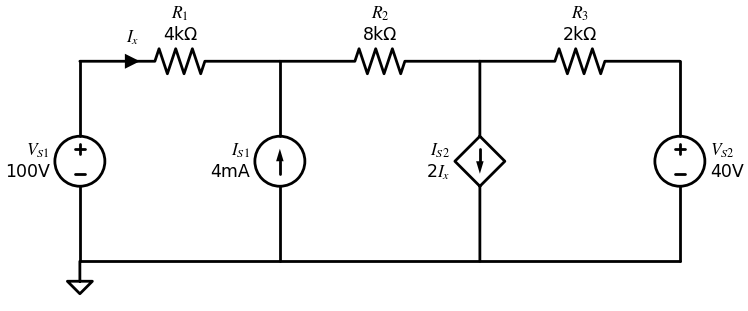

In [25]:



with schemdraw.Drawing(file='mesh-dependent-supers.svg') as d:
    d.config(unit=4)
    d += (Vs1 := elm.SourceV().up().label('$V_{S1}$\n100V'))
    d += (R1 := elm.Resistor().right().label('$R_{1}$\n4kΩ'))
    d += (R2 := elm.Resistor().right().label('$R_{2}$\n8kΩ'))
    d += (R3 := elm.Resistor().right().label('$R_{3}$\n2kΩ'))
    d += (Vs2 := elm.SourceV().down().label('$V_{S2}$\n40V',loc='bottom').reverse())
    d += (LineB := elm.Line().left().tox(R1.start))
    d += (GndSig := elm.GroundSignal())
    d += (Is1 := elm.SourceI().at(R1.end).down().label('$I_{S1}$\n4mA').reverse())
    d += (Is2 := elm.SourceControlledI().at(R2.end).down().label('$I_{S2}$\n2$I_x$'))
    d += elm.CurrentLabelInline(direction='in').at(R1).label('$I_x$')

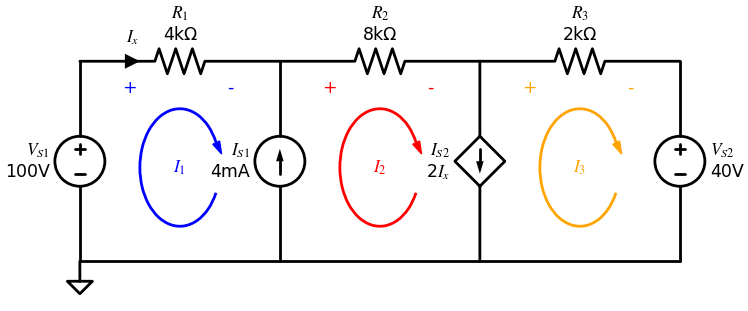

In [26]:



with schemdraw.Drawing(file='mesh-dependent-supers-annotated.svg') as d:
    d.config(unit=4)
    d += (Vs1 := elm.SourceV().up().label('$V_{S1}$\n100V'))
    d += (R1 := elm.Resistor().right().label('$R_{1}$\n4kΩ').label(('+','','-'),loc='bottom',color='blue'))
    d += (R2 := elm.Resistor().right().label('$R_{2}$\n8kΩ').label(('+','','-'),loc='bottom',color='red'))
    d += (R3 := elm.Resistor().right().label('$R_{3}$\n2kΩ').label(('+','','-'),loc='bottom',color='orange'))
    d += (Vs2 := elm.SourceV().down().label('$V_{S2}$\n40V',loc='bottom').reverse())
    d += (LineB := elm.Line().left().tox(R1.start))
    d += (GndSig := elm.GroundSignal())
    d += (Is1 := elm.SourceI().at(R1.end).down().label('$I_{S1}$\n4mA').reverse())
    d += (Is2 := elm.SourceControlledI().at(R2.end).down().label('$I_{S2}$\n2$I_x$'))
    d += elm.CurrentLabelInline(direction='in').at(R1).label('$I_x$')
    d += elm.LoopCurrent([R1,Is1,LineB,Vs1],pad=0.7).label('$I_1$').color('blue')
    d += elm.LoopCurrent([R2,Is2,LineB,Is1],pad=0.7).label('$I_2$').color('red')
    d += elm.LoopCurrent([R3,Vs2,LineB,Is2],pad=0.7).label('$I_3$').color('orange')

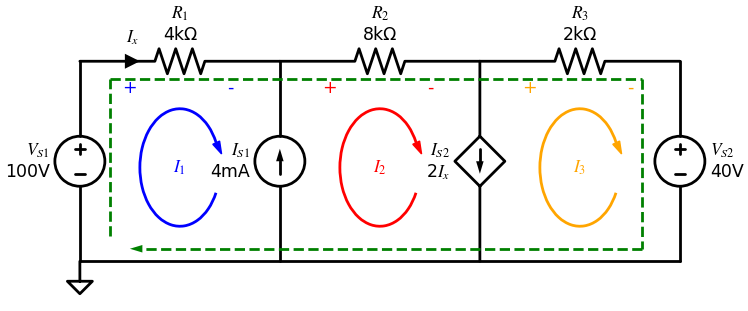

In [27]:



with schemdraw.Drawing(file='mesh-dependent-supers-annotated-supermesh.svg') as d:
    d.config(unit=4)
    d += (Vs1 := elm.SourceV().up().label('$V_{S1}$\n100V'))
    d += (R1 := elm.Resistor().right().label('$R_{1}$\n4kΩ').label(('+','','-'),loc='bottom',color='blue'))
    d += (R2 := elm.Resistor().right().label('$R_{2}$\n8kΩ').label(('+','','-'),loc='bottom',color='red'))
    d += (R3 := elm.Resistor().right().label('$R_{3}$\n2kΩ').label(('+','','-'),loc='bottom',color='orange'))
    d += (Vs2 := elm.SourceV().down().label('$V_{S2}$\n40V',loc='bottom').reverse())
    d += (LineB := elm.Line().left().tox(R1.start))
    d += (GndSig := elm.GroundSignal())
    d += (Is1 := elm.SourceI().at(R1.end).down().label('$I_{S1}$\n4mA').reverse())
    d += (Is2 := elm.SourceControlledI().at(R2.end).down().label('$I_{S2}$\n2$I_x$'))
    d += elm.CurrentLabelInline(direction='in').at(R1).label('$I_x$')
    d += elm.LoopCurrent([R1,Is1,LineB,Vs1],pad=0.7).label('$I_1$').color('blue')
    d += elm.LoopCurrent([R2,Is2,LineB,Is1],pad=0.7).label('$I_2$').color('red')
    d += elm.LoopCurrent([R3,Vs2,LineB,Is2],pad=0.7).label('$I_3$').color('orange')

    d += elm.Line().linestyle('--').at(Vs.start,dx=0.6,dy=0.5).up().color('green').toy(3.65)
    d += elm.Line().linestyle('--').right().color('green').tox(11.25)
    d += elm.Line().linestyle('--').down().color('green').toy(0.25)
    d += elm.Line(arrow='->').linestyle('--').left().color('green').tox(1)

Dependent supplies can also affect the KCL equations. Here is an example of that case:

`````{admonition} Example
Find the mesh currents

```{figure} mesh-dependent-supers.svg
---
height: 300px
name: mesh-dependent-supers
---
```

````{admonition} Solution
:class: tip, dropdown
Let's mark up the schematic in the usual manner:
```{figure} mesh-dependent-supers-annotated.svg
---
height: 300px
name: mesh-dependent-supers-annotated
---
```
Since there are two current supplies in the circuit we will write 2 KCL equations.  That leaves one equation as a KVL, but where?

$$2\text{ KCL}+1\text{ KVL}=3\text{ Unknowns}$$

I like this problem as it combines concepts and even pushes one step further.  The KVL we need to write cannot cross a current supply without adding another unknown.  Take a moment and look for and super-meshes in the circuit.  $I_{S1}$ has $I_1$ and $I_2$ flowing through it implying the two meshes form a super loop.  However, if we try to write a KVL around those two meshes we encounter $I_{S2}$.

We must also notice that $I_{S2}$ has $I_2$ and $I_3$ flowing through it implying the two meshes form another super loop.  However, if we try to write a KVL around those two meshes we encounter $I_{S1}$.

This gives rise to what some of my students have deemed a "super-duper loop".  It's really just one larger super loop but that's not nearly as fun to say.  The KVL we will write is around all three meshes together.  In this circuit that is around the outer loop though other circuits with more meshes might see this loop pass through the interior of the circuit.  Here is the super loop marked with a dashed green line

```{figure} mesh-dependent-supers-annotated-supermesh.svg
---
height: 300px
name: mesh-dependent-supers-annotated-supermesh
---
```
We start by writing the KCLs for each current supply.  The KCL for $I_{S1}$ is a typical KCL as it is an independent supply.

\begin{eqnarray*}
\color{green}-I_1+I_2=I_{S1}
\color{green}-I_1+I_2=4\text{mA}
\end{eqnarray*}

The KCL for $I_{S2}$ involves the dependent supply for we need to perform the substitution for the control variable.  $I_x$ in terms of the mesh currents is

$$\color{green}I_x=I_1$$

which we substitute into the KCL for $I_{S2}$.

\begin{eqnarray*}
\color{green}I_2-I_3=2I_x\\
\color{green}I_2-I_3=2I_1\\
\color{green}-2I_1+I_2-I_3=0\\
\end{eqnarray*}

The KVL then follows the dotted green line

\begin{eqnarray*}
\color{green}V_{S1}-V_{R1}-V_{R2}-V_{R3}-V_{S2}=0\\
\color{green}V_{S1}-I_1R_1-I_2R_2-I_3R_3-V_{S2}=0\\
\color{green}-R_1I_1-R_2I_2-R_3I_3=-V_{S1}+V_{S2}\\
\color{green}-4\text{k}I_1-8\text{k}I_2-2\text{k}I_3=-60\\
\end{eqnarray*}

Gathering the equations that will be included in the system:

\begin{eqnarray*}
\color{green}-I_1+I_2=4\text{mA}\\
\color{green}-2I_1+I_2-I_3=0\\
\color{green}-4\text{k}I_1-8\text{k}I_2-2\text{k}I_3=-60\\
\end{eqnarray*}

We'll solve these using matrices but be weary of the missing term in the first equation.  Look for the 0 entry for this missing term.

$$\left[ \begin{array}{ccc}
-1&1&0\\
-2&1&-1\\
-4\text{k}&-8\text{k}&-2\text{k}\\
\end{array} \right]^{-1}\left[\begin{array}{c}4\text{mA}\\0\\-60\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\\I_3\end{array}\right]=\left[\begin{array}{c}2\text{mA}\\6\text{mA}\\2\text{mA}\end{array}\right]$$


````
`````

## The Shortcut

Mesh Analysis can be performed quickly in some cases. I am not inviting you to forget everything we just did. When I do things quickly I'm less confident in the result. However, with practice you can solve many circuit analysis problems using Mesh analysis in about a minute.

We can use mesh analysis on some problems by writing values directly into the matrix. In order to do this we must label all mesh currents in the same direction. I have the habit of marking all mesh currents in the clockwise direction but it works equally well in the counter-clockwise direction. This is not a requirement for Mesh Analysis but it makes this shortcut much less error-prone.

### Basic Shortcut

I'm comfortable using the shortcut on problems without dependent supplies. It is not impossible to use the shortcut on circuits with dependent supplies but I tend to slow down and make sure everything ends up in the right place for those circuits. I'll address use of the shortcut for those problems in the next section. Here we'll limit the discussion to those circuits without dependent supplies.

We begin by setting up a matrix and vector appropriate for the circuit being analyzed. In the case of the first problem we solved using Mesh analysis, we used a 2x2 matrix and a 2x1 vector. Let revisit that problem

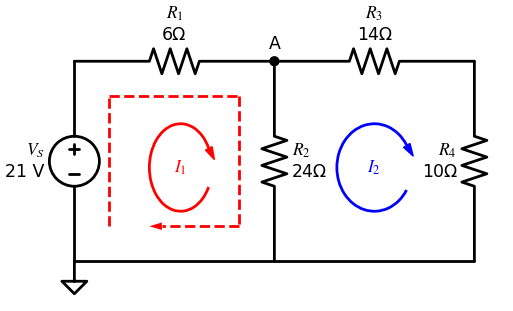

In [28]:



with schemdraw.Drawing(file='mesh-toy-problem-mesh-shortcut1.svg') as d:
    d.config(unit=4)
    d += (Vs := elm.SourceV().up().label('$V_S$\n21 V'))
    d += (R1 := elm.Resistor().right().label('$R_1$\n6Ω'))
    d += (R3 := elm.Resistor().right().label('$R_3$\n14Ω'))
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_2$\n24Ω',loc='bottom'))
    d += (R4 := elm.Resistor().at(R3.end).down().label('$R_4$\n10Ω'))
    d += (LineB := elm.Line().left().tox(R1.start))
    d += elm.GroundSignal()
    d += (nodeA := elm.Dot().at(R1.end).label('A',loc='top'))
    d += elm.LoopCurrent([R1,R2,LineB,Vs],pad=1).label('$I_1$').color('red')
    d += elm.LoopCurrent([R3,R4,LineB,R2],pad=1).label('$I_2$').color('blue')

    d += elm.Line().linestyle('--').at(Vs.start,dx=0.7,dy=0.7).up().color('red').toy(3.3)
    d += elm.Line().linestyle('--').right().color('red').tox(3.3)
    d += elm.Line().linestyle('--').down().color('red').toy(0.7)
    d += elm.Line(arrow='->').linestyle('--').left().color('red').tox(1.5)

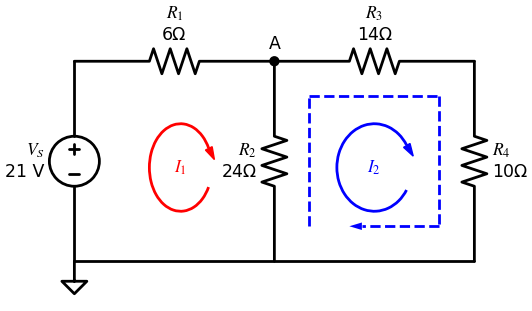

In [29]:



with schemdraw.Drawing(file='mesh-toy-problem-mesh-shortcut2.svg') as d:
    d.config(unit=4)
    d += (Vs := elm.SourceV().up().label('$V_S$\n21 V'))
    d += (R1 := elm.Resistor().right().label('$R_1$\n6Ω'))
    d += (R3 := elm.Resistor().right().label('$R_3$\n14Ω'))
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_2$\n24Ω',loc='top'))
    d += (R4 := elm.Resistor().at(R3.end).down().label('$R_4$\n10Ω',loc='bottom'))
    d += (LineB := elm.Line().left().tox(R1.start))
    d += elm.GroundSignal()
    d += (nodeA := elm.Dot().at(R1.end).label('A',loc='top'))
    d += elm.LoopCurrent([R1,R2,LineB,Vs],pad=1).label('$I_1$').color('red')
    d += elm.LoopCurrent([R3,R4,LineB,R2],pad=1).label('$I_2$').color('blue')

    d += elm.Line().linestyle('--').at(Vs.start,dx=4.7,dy=0.7).up().color('blue').toy(3.3)
    d += elm.Line().linestyle('--').right().color('blue').tox(7.3)
    d += elm.Line().linestyle('--').down().color('blue').toy(0.7)
    d += elm.Line(arrow='->').linestyle('--').left().color('blue').tox(5.5)

`````{admonition} Example
```{figure} mesh-toy-problem-mesh1.svg
---
height: 300px
name: mesh-toy-problem-mesh1-shortcut
---
```

````{admonition} Solution
:class: tip, dropdown
We begin with an empty matrix and vector as described above, and a plan. For this circuit we will write two KVL equations. One for the $I_1$ mesh and one for the $I_2$ mesh. A single row of the matrix will be dedicated to each.

$$ \begin{array}{c}
\text{KVL}~I_{1}\\
\text{KVL}~I_{2}\\
\end{array}\left[ \begin{array}{cc}
~&~\\
~&~\\
\end{array} \right]^{-1}\left[\begin{array}{c}~\\~\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}~\\~\end{array}\right]$$

We now fill in each row according to our plan. We start with the KVL for the $I_1$ mesh. It is helpful in the case of KVL equations to indicate the path we are taking around the circuit. This path is shown as a doted line in the figure below

```{figure} mesh-toy-problem-mesh-shortcut1.svg
---
height: 300px
name: mesh-toy-problem-mesh-shortcut1
---
```
We will follow this dotted line for each entry in the matrix regarding the KVL for the $I_1$ mesh. If we follow the dotted line we cross three components: $V_S$, $R_1$, and $R_2$. Keep this in mind as we fill the entries of the first matrix row. To fill in this row I ask three questions:

1. **What passive components does the dotted path cross that have $I_1$ flowing through them?** For this circuit the answer is $R_1$ and $R_2$. We add the values of those resistors and put them in the matrix. Since we are considering the KVL for the $I_1$ mesh and we are asking about which components carry $I_1$ we make this value positive in the matrix. Here we will enter +30.
2. **What passive components does the dotted path cross that have $I_2$ flowing through them?** For this circuit only $R_2$ meets this criterion. We again add the values (only one in this case) and enter it in the matrix. Since we are considering the KVL for the $I_1$ mesh and we are considering which components carry $I_2$ we enter it as a negative number. Here we will enter -24.
3. **Do we cross any voltage supplies?** We do, namely $V_S$. We also consider which direction we cross $V_S$ as we travel clockwise. Here we start at the negative terminal and cross to the positive terminal so there is a voltage rise. Since it is a rise we enter it as a positive value in the 2x1 vector. Here we will enter +21.

Let's pause and look at what the system looks like:

$$\begin{array}{c}
\text{KVL}~I_{1}\\
\text{KVL}~I_{2}\\
\end{array}\left[ \begin{array}{cc}
+30&-24\\
~&~\\
\end{array} \right]^{-1}\left[\begin{array}{c}+21\\~\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}~\\~\end{array}\right]$$

We cannot find a solution until have the same number of equations as unknowns (two here). I ask similar questions when considering the KVL for the $I_2$ mesh.

```{figure} mesh-toy-problem-mesh-shortcut2.svg
---
height: 300px
name: mesh-toy-problem-mesh-shortcut2
---
```

We will follow the new dotted line for each entry in the matrix regarding the KVL for the $I_2$ mesh. If we follow the dotted line we cross three components: $R_2$, $R_3$, and $R_4$. Keep this in mind as we fill the entries of the second matrix row. To fill in this row I ask three questions:


1. **What passive components does the dotted path cross that have $I_1$ flowing through them?** For this circuit the answer $R_2$. We add the values of those resistors and put them in the matrix. Since we are considering the KVL for the $I_2$ mesh and we are considering which components carry $I_1$ we enter it as a negative number. Here we will enter -24.
2. **What passive components does the dotted path cross that have $I_2$ flowing through them?** For this circuit $R_2$, $R_3$, and $R_4$ meet this criterion. We again add the values and enter it in the matrix. Since we are considering the KVL for the $I_2$ mesh and we are asking about which components carry $I_2$ we make this value positive in the matrix. Here we will enter +48.
3. **Do we cross any voltage supplies?** There are no voltage supplies on this mesh. Therefore we enter a 0 in the 2x1 vector.


Let's pause again and look at what the system looks like:

$$ \begin{array}{c}
\text{KVL}~I_{1}\\
\text{KVL}~I_{2}\\
\end{array}\left[ \begin{array}{cc}
+30&-24\\
-24&+48\\
\end{array} \right]^{-1}\left[\begin{array}{c}+21\\0\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}~\\~\end{array}\right]$$

Once the 2x2 matrix and 2x1 vector are completed we can solve the system.

$$\begin{array}{c}
\text{KVL}~I_{1}\\
\text{KVL}~I_{2}\\
\end{array}\left[ \begin{array}{cc}
+30&-24\\
-24&+48\\
\end{array} \right]^{-1}\left[\begin{array}{c}+21\\0\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}1.167~\text{A}\\583.3~\text{mA}\end{array}\right]$$

If you look back at the first time we analyzed this circuit you'll notice that the matrices appear similar but have some differences. The two systems may be different but are mathematically equivalent. Solving either system leads to the same mesh currents.

````
`````

I'm not going to explicitly state the questions for the next example. Try to use the previous example to anticipate how I will fill up the matrices for this analysis.

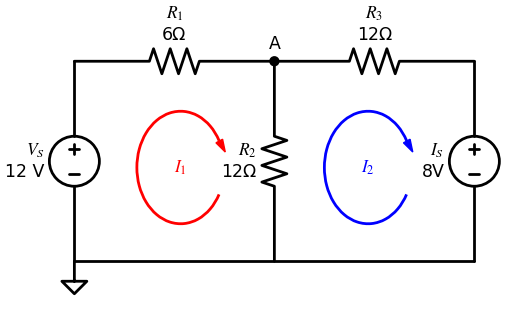

In [30]:



with schemdraw.Drawing(file='mesh-multiple-sources-shortcut.svg') as d:
    d.config(unit=4)
    d += (Vs := elm.SourceV().up().label('$V_S$\n12 V'))
    d += (R1 := elm.Resistor().right().label('$R_1$\n6Ω'))
    d += (R3 := elm.Resistor().right().label('$R_3$\n12Ω'))
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_2$\n12Ω'))
    d += (R4 := elm.SourceV().at(R3.end).down().label('$I_S$\n8V').reverse())
    d += elm.Line().left().tox(R1.start)
    d += elm.GroundSignal()
    d += (nodeA := elm.Dot().at(R1.end).label('A',loc='top'))
    d += elm.LoopCurrent([R1,R2,LineB,Vs],pad=.75).label('$I_1$').color('red')
    d += elm.LoopCurrent([R3,R4,LineB,R2],pad=.75,direction='cw').label('$I_2$').color('blue')

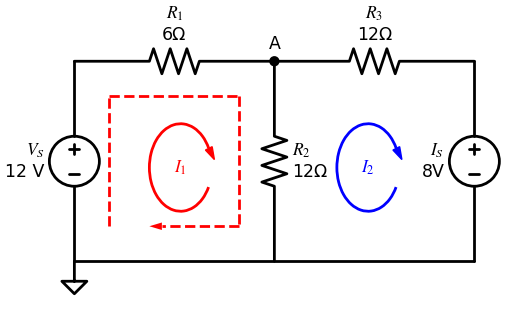

In [31]:



with schemdraw.Drawing(file='mesh-multiple-sources-shortcut1.svg') as d:
    d.config(unit=4)
    d += (Vs := elm.SourceV().up().label('$V_S$\n12 V'))
    d += (R1 := elm.Resistor().right().label('$R_1$\n6Ω'))
    d += (R3 := elm.Resistor().right().label('$R_3$\n12Ω'))
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_2$\n12Ω',loc='bottom'))
    d += (R4 := elm.SourceV().at(R3.end).down().label('$I_S$\n8V').reverse())
    d += elm.Line().left().tox(R1.start)
    d += elm.GroundSignal()
    d += (nodeA := elm.Dot().at(R1.end).label('A',loc='top'))
    d += elm.LoopCurrent([R1,R2,LineB,Vs],pad=1).label('$I_1$').color('red')
    d += elm.LoopCurrent([R3,R4,LineB,R2],pad=1,direction='cw').label('$I_2$').color('blue')

    d += elm.Line().linestyle('--').at(Vs.start,dx=0.7,dy=0.7).up().color('red').toy(3.3)
    d += elm.Line().linestyle('--').right().color('red').tox(3.3)
    d += elm.Line().linestyle('--').down().color('red').toy(0.7)
    d += elm.Line(arrow='->').linestyle('--').left().color('red').tox(1.5)

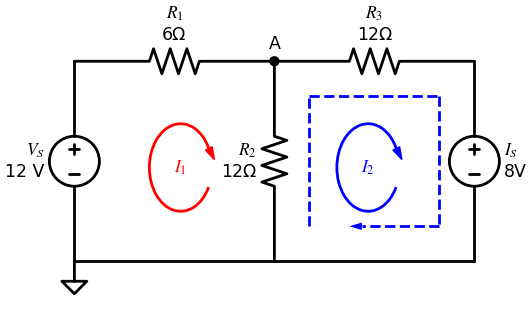

In [32]:



with schemdraw.Drawing(file='mesh-multiple-sources-shortcut2.svg') as d:
    d.config(unit=4)
    d += (Vs := elm.SourceV().up().label('$V_S$\n12 V'))
    d += (R1 := elm.Resistor().right().label('$R_1$\n6Ω'))
    d += (R3 := elm.Resistor().right().label('$R_3$\n12Ω'))
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_2$\n12Ω',loc='top'))
    d += (R4 := elm.SourceV().at(R3.end).down().label('$I_S$\n8V',loc='bottom').reverse())
    d += elm.Line().left().tox(R1.start)
    d += elm.GroundSignal()
    d += (nodeA := elm.Dot().at(R1.end).label('A',loc='top'))
    d += elm.LoopCurrent([R1,R2,LineB,Vs],pad=1).label('$I_1$').color('red')
    d += elm.LoopCurrent([R3,R4,LineB,R2],pad=1,direction='cw').label('$I_2$').color('blue')

    d += elm.Line().linestyle('--').at(Vs.start,dx=4.7,dy=0.7).up().color('blue').toy(3.3)
    d += elm.Line().linestyle('--').right().color('blue').tox(7.3)
    d += elm.Line().linestyle('--').down().color('blue').toy(0.7)
    d += elm.Line(arrow='->').linestyle('--').left().color('blue').tox(5.5)

`````{admonition} Example

```{figure} mesh-multiple-sources-shortcut.svg
---
height: 300px
name: mesh-multiple-sources-shortcut
---
```

````{admonition} Solution
:class: tip, dropdown
This circuit also has 2 meshes so the blank system will be setup in the same way as the previous example. Also, the plan does not change since there are no current supplies in the circuit. We will write two KVL equations again.

$$\begin{array}{c}
\text{KVL}~I_{1}\\
\text{KVL}~I_{2}\\
\end{array}\left[ \begin{array}{cc}
~&~\\
~&~\\
\end{array} \right]^{-1}\left[\begin{array}{c}~\\~\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]= \left[\begin{array}{c}~\\~\end{array}\right]$$

We'll still proceed row by row beginning with the KVL for the $I_1$ mesh current in the first row.

```{figure} mesh-multiple-sources-shortcut1.svg
---
height: 300px
name: mesh-multiple-sources-shortcut1
---
```
Follow the dotted path and see if you can ask yourself the correct questions to fill in the first row.

$$\begin{array}{c}
\text{KVL}~I_{1}\\
\text{KVL}~I_{2}\\
\end{array}\left[ \begin{array}{cc}
18&-12\\
~&~\\
\end{array} \right]^{-1}\left[\begin{array}{c}12\\~\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]= \left[\begin{array}{c}~\\~\end{array}\right]$$

We now move on the the KVL for the $I_2$ mesh. Let's move the dotted line to that mesh.

```{figure} mesh-multiple-sources-shortcut2.svg
---
height: 300px
name: mesh-multiple-sources-shortcut2
---
```
Again, follow the dotted path and see if you can ask yourself the correct questions to fill in the second row.

$$\begin{array}{c}
\text{KVL}~I_{1}\\
\text{KVL}~I_{2}\\
\end{array}\left[ \begin{array}{cc}
18&-12\\
-12&24\\
\end{array} \right]^{-1}\left[\begin{array}{c}12\\-8\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]= \left[\begin{array}{c}~\\~\end{array}\right]$$

Finally, solve the system.

$$\begin{array}{c}
\text{KVL}~I_{1}\\
\text{KVL}~I_{2}\\
\end{array}\left[ \begin{array}{cc}
18&-12\\
-12&24\\
\end{array} \right]^{-1}\left[\begin{array}{c}12\\-8\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]= \left[\begin{array}{c}666.7~\text{mA}\\0~\text{A}\end{array}\right]$$

Once again, the mesh currents found using this method are the same as those previous found.
````
`````

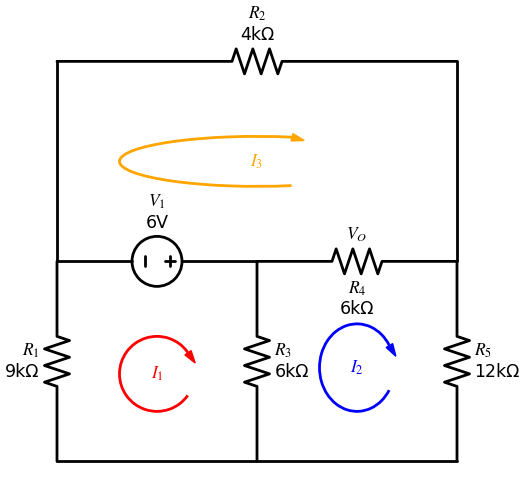

In [33]:



with schemdraw.Drawing(file='mesh-3-meshes-shortcut.svg') as d:
    d.config(unit=4)
    d += (R1 := elm.Resistor().up().label('$R_1$\n9kΩ'))
    d += (V1 := elm.SourceV().right().label('$V_1$\n6V'))
    d += (R4 := elm.Resistor().right().label('$R_4$\n6kΩ',loc='bottom').label(('','$V_O$',''),loc='top',color='black'))
    d += (R5 := elm.Resistor().down().label('$R_5$\n12kΩ',loc='bottom'))
    d += (LineB := elm.Line().left().tox(V1.start))
    d += (R3 := elm.Resistor().at(V1.end).down().label('$R_3$\n6kΩ',loc='bottom'))
    d += (LineL := elm.Line().at(V1.start).up().length(4))
    d += (R2 := elm.Resistor().right().tox(R4.end).label('$R_2$\n4kΩ'))
    d += (LineR := elm.Line().down().length(4))
    d += elm.LoopCurrent([V1,R3,LineB,R1],pad=1).label('$I_1$').color('red')
    d += elm.LoopCurrent([R4,R5,LineB,R3],pad=1).label('$I_2$').color('blue')
    d += elm.LoopCurrent([R2,LineR,R4,LineL],pad=1.25).label('$I_3$').color('orange')

Now the gloves are really off. I'll fill out the matrices in a single line. Makes sure you can replicate the result.

````{admonition} Example
Find the mesh currents
```{figure} mesh-3-meshes-shortcut.svg
---
height: 300px
name: mesh-3-meshes-shortcut
---
```
```{admonition} Solution
:class: tip, dropdown

$$ \begin{array}{c}
\text{KVL}~I_{1}\\
\text{KVL}~I_{2}\\
\text{KVL}~I_{3}\\
\end{array}\left[ \begin{array}{ccc}
15\text{k}&-6\text{k}&0\\
-6\text{k}&24\text{k}&-6\text{k}\\
0&-6\text{k}&10\text{k}\\
\end{array} \right]^{-1}\left[\begin{array}{c}6\\0\\-6\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\\I_3\end{array}\right]= \left[\begin{array}{c}373.33~\mu\text{A}\\-66.67~\mu\text{A}\\-640.00~\mu\text{A}\end{array}\right]$$
```
````

We can handle circuits that have current supplies using a similar approach. let's take the first example as a circuit with a current supply that is **not** a super-mesh.

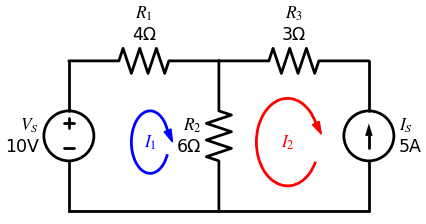

In [34]:



with schemdraw.Drawing(file='mesh-current-supply-shortcut.svg') as d:
    d += (V1 := elm.SourceV().up().label('$V_S$\n10V'))
    d += (R1 := elm.Resistor().right().label('$R_1$\n4Ω'))
    d += (R3 := elm.Resistor().right().label('$R_3$\n3Ω'))
    d += (Is := elm.SourceI().down().label('$I_S$\n5A',loc='bottom').reverse())
    d += (LineB := elm.Line().left().tox(R1.start))
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_2$\n6Ω'))
    d += elm.LoopCurrent([R1,R2,LineB,Vs],pad=0.75).label('$I_1$').color('blue')
    d += elm.LoopCurrent([R3,Is,LineB,R2],pad=0.5).label('$I_2$').color('red')

````{admonition} Example
Find the mesh currents
```{figure} mesh-current-supply-shortcut.svg
---
height: 300px
name: mesh-current-supply-shortcut
---
```
```{admonition} Solution
:class: tip, dropdown
We have to make our plan just as before and the questions for the KCL equations are different.
We'll write a KCL for the $I_2$ mesh current since it has a current supply. We will also write a KVL around the $I_1$ mesh to complete the system of equations.

The row for the KVL is filled just as we did before. Here is is filled in:

$$\begin{array}{c}
\text{KVL}~I_{1}\\
\text{KCL}~I_{2}\\
\end{array}\left[ \begin{array}{cc}
10&-6\\
~&~\\
\end{array} \right]^{-1}\left[\begin{array}{c}10\\~\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}~\\~\end{array}\right]$$

To fill in a row for a KCL I ask a question for each mesh current:

1. **Does $I_1$ flow through the current supply?** For this circuit the answer no. Therefore, $I_1$ does not appear in the KCL equation. The coefficient is therefore 0.
2. **Does $I_2$ flow through the current supply?** For this circuit the answer is yes which leads to a follow-up question: **Does the mesh current flow with or against the direction of the current supply?** In this circuit $I_2$ flows against the flow of $I_S$. Since is in the KCL equation the coefficient will have a magnitude of 1. Since it flows against the supply current it will be negative. We enter -1 for this entry.

The right hand side of the KCL is simply the value of the regulated current. Here is the system filled in and ready to solve:

$$\begin{array}{c}
\text{KVL}~I_{1}\\
\text{KCL}~I_{2}\\
\end{array}\left[ \begin{array}{cc}
10&-6\\
0&-1\\
\end{array} \right]^{-1}\left[\begin{array}{c}10\\5\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}~\\~\end{array}\right]$$

Now we can solve for the mesh currents

$$\begin{array}{c}
\text{KVL}~I_{1}\\
\text{KCL}~I_{2}\\
\end{array}\left[ \begin{array}{cc}
10&-6\\
0&-1\\
\end{array} \right]^{-1}\left[\begin{array}{c}10\\5\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}-2~\text{A}\\-5~\text{A}\end{array}\right]$$

```
````

If current supplies are present in a circuit it is possible they create a super-loop. In the next example I'll use the shortcut on a circuit with a current supply. The current supply will have two mesh currents flowing through it leading to a super-loop.

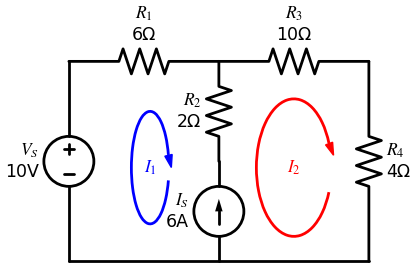

In [35]:



with schemdraw.Drawing(file='mesh-super-shortcut.svg') as d:
    d += (V1 := elm.SourceV().up().label('$V_S$\n10V').length(4))
    d += (R1 := elm.Resistor().right().label('$R_1$\n6Ω'))
    d += (R3 := elm.Resistor().right().label('$R_3$\n10Ω'))
    d += (R4 := elm.Resistor().down().label('$R_4$\n4Ω',loc='bottom').length(4))
    d += (LineB := elm.Line().left().tox(R1.start))
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_2$\n2Ω').length(2))
    d += (Is := elm.SourceI().down().label('$I_S$\n6A').length(2).reverse())
    d += elm.LoopCurrent([R1,R2,LineB,Vs],pad=0.75).label('$I_1$').color('blue')
    d += elm.LoopCurrent([R3,R4,LineB,R2],pad=0.5).label('$I_2$').color('red')

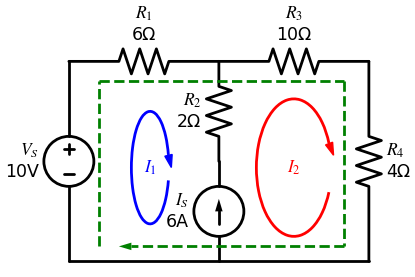

In [36]:



with schemdraw.Drawing(file='mesh-super-shortcut1.svg') as d:
    d += (V1 := elm.SourceV().up().label('$V_S$\n10V').length(4))
    d += (R1 := elm.Resistor().right().label('$R_1$\n6Ω'))
    d += (R3 := elm.Resistor().right().label('$R_3$\n10Ω'))
    d += (R4 := elm.Resistor().down().label('$R_4$\n4Ω',loc='bottom').length(4))
    d += (LineB := elm.Line().left().tox(R1.start))
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_2$\n2Ω').length(2))
    d += (Is := elm.SourceI().down().label('$I_S$\n6A').length(2).reverse())
    d += elm.LoopCurrent([R1,R2,LineB,Vs],pad=0.75).label('$I_1$').color('blue')
    d += elm.LoopCurrent([R3,R4,LineB,R2],pad=0.5).label('$I_2$').color('red')

    d += elm.Line().linestyle('--').at(Vs.start,dx=0.6,dy=0.3).up().color('green').toy(3.6)
    d += elm.Line().linestyle('--').right().color('green').tox(5.5)
    d += elm.Line().linestyle('--').down().color('green').toy(0.3)
    d += elm.Line(arrow='->').linestyle('--').left().color('green').tox(1)

`````{admonition} Example
Find the mesh currents
```{figure} mesh-super-shortcut.svg
---
height: 300px
name: mesh-super-shortcut
---
```
````{admonition} Solution
:class: tip, dropdown
We make the plan for this circuit.  One current supply and two meshes leads to

$$\begin{array}{c}
\text{Super KVL}\\
\text{Super KCL}\\
\end{array}\left[ \begin{array}{cc}
~&~\\
~&~\\
\end{array} \right]^{-1}\left[\begin{array}{c}~\\~\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}~\\~\end{array}\right]$$

In order the complete the row for the super-loop KVL we have to be clear on what components we will cross as we move around the loop. To makes this easier for now I've marked the super-loop with a the dotted path shown here:

```{figure} mesh-super-shortcut1.svg
---
height: 300px
name: mesh-super-shortcut1
---
```

As we fill in the super KVL rwo we only consider components on this path. The KVL questions change form slightly to take into consideration the super-loop.

1. **What passive components does the dotted path cross that have $I_1$ flowing through them?** For this circuit the answer $R_1$. We add the values of the resistors (on in this case) and put the sum in the matrix. Since we are considering the super-KVL and $I_1$ is part of the super-loop we enter it as a positive number. Here we will enter 6.
2. **What passive components does the dotted path cross that have $I_2$ flowing through them?** For this circuit $R_3$ and $R_4$ meet this criterion. We again add the values and enter it in the matrix. Since we are considering the super-KVL and $I_2$ is part of the super-loop we enter it as a positive number. Here we will enter 14.
3. **Do we cross any voltage supplies?** } There are no voltage supplies on this mesh. Therefore we enter a +20 in the 2x1 vector.

$$\begin{array}{c}
\text{Super KVL}\\
\text{Super KCL}\\
\end{array}\left[ \begin{array}{cc}
6&14\\
~&~\\
\end{array} \right]^{-1}\left[\begin{array}{c}20\\~\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}~\\~\end{array}\right]$$

We ask identical questions to fill in the super-KCL. Look back at the KCL questions from the previous examples to convince yourself.

1. Does $I_1$ flow through the current supply?} For this circuit the answer is yes which leads to a follow-up question: **Does the mesh current flow with or against the direction of the current supply?** In this circuit $I_1$ flows against the flow of $I_S$. Since is in the KCL equation the coefficient will have a magnitude of 1. Since it flows against the supply current it will be negative. We enter -1 for this entry.
2. **Does $I_2$ flow through the current supply?** For this circuit the answer is yes which leads to a follow-up question: **Does the mesh current flow with or against the direction of the current supply?** In this circuit $I_2$ flows with the flow of $I_S$. Since is in the KCL equation the coefficient will have a magnitude of 1. Since it flows with the supply current it will be positive. We enter +1 for this entry.

The right hand side of the KCL is simply the value of the regulated current. Here is the system filled in and ready to solve:

$$\begin{array}{c}
\text{Super KVL}\\
\text{Super KCL}\\
\end{array}\left[ \begin{array}{cc}
6&14\\
-1&1\\
\end{array} \right]^{-1}\left[\begin{array}{c}20\\6\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}~\\~\end{array}\right]$$

Now we can solve for the mesh currents

$$\begin{array}{c}
\text{Super KVL}\\
\text{Super KCL}\\
\end{array}\left[ \begin{array}{cc}
6&14\\
-1&1\\
\end{array} \right]^{-1}\left[\begin{array}{c}20\\6\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}-3.2~\text{A}\\2.8~\text{A}\end{array}\right]$$

````
`````

Let's try a circuit with a super-mesh that cuts through the intermediate branches

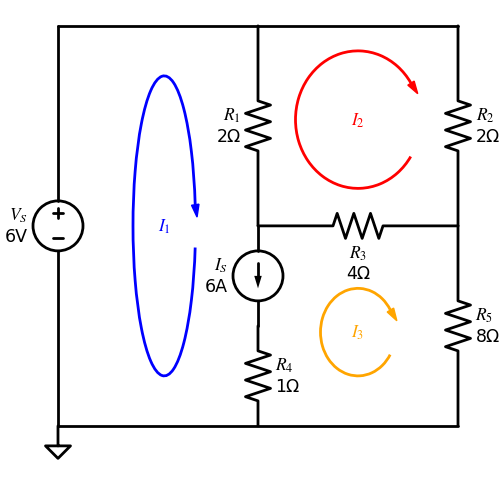

In [37]:



with schemdraw.Drawing(file='mesh-super-3-shortcut.svg') as d:
    d.config(unit=4)
    d += (V1 := elm.SourceV().up().label('$V_S$\n6V').length(8))
    d += (LineT1 := elm.Line().right().length(4))
    d += (LineT2 := elm.Line().right().length(4))
    d += (R2 := elm.Resistor().down().label('$R_2$\n2Ω',loc='bottom'))
    d += (R5 := elm.Resistor().down().length(4).label('$R_5$\n8Ω',loc='bottom'))
    d += (LineB := elm.Line().left().length(8))
    d += (GndSig := elm.GroundSignal())
    d += (R1 := elm.Resistor().at(LineT1.end).down().label('$R_1$\n2Ω',loc='top'))
    d += (Is := elm.SourceI().down().length(2).label('$I_S$\n6A',loc='top'))
    d += (R4 := elm.Resistor().down().length(2).label('$R_4$\n1Ω',loc='bottom'))
    d += (R3 := elm.Resistor().at(R1.end).right().label('$R_3$\n4Ω',loc='bottom'))
    d += elm.LoopCurrent([LineT1,R1,LineB,Vs],pad=1).label('$I_1$').color('blue')
    d += elm.LoopCurrent([LineT2,R2,R3,R1],pad=0.5).label('$I_2$').color('red')
    d += elm.LoopCurrent([R3,R5,LineB,R4],pad=1).label('$I_3$').color('orange')

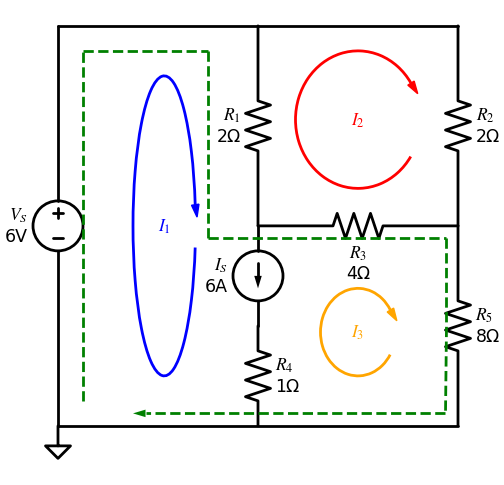

In [38]:



with schemdraw.Drawing(file='mesh-super-3-super-loop-shortcut.svg') as d:
    d.config(unit=4)
    d += (V1 := elm.SourceV().up().label('$V_S$\n6V').length(8))
    d += (LineT1 := elm.Line().right().length(4))
    d += (LineT2 := elm.Line().right().length(4))
    d += (R2 := elm.Resistor().down().label('$R_2$\n2Ω',loc='bottom'))
    d += (R5 := elm.Resistor().down().length(4).label('$R_5$\n8Ω',loc='bottom'))
    d += (LineB := elm.Line().left().length(8))
    d += (GndSig := elm.GroundSignal())
    d += (R1 := elm.Resistor().at(LineT1.end).down().label('$R_1$\n2Ω',loc='top'))
    d += (Is := elm.SourceI().down().length(2).label('$I_S$\n6A',loc='top'))
    d += (R4 := elm.Resistor().down().length(2).label('$R_4$\n1Ω',loc='bottom'))
    d += (R3 := elm.Resistor().at(R1.end).right().label('$R_3$\n4Ω',loc='bottom'))
    d += elm.LoopCurrent([LineT1,R1,LineB,Vs],pad=1).label('$I_1$').color('blue')
    d += elm.LoopCurrent([LineT2,R2,R3,R1],pad=0.5).label('$I_2$').color('red')
    d += elm.LoopCurrent([R3,R5,LineB,R4],pad=1).label('$I_3$').color('orange')

    d += elm.Line().linestyle('--').at(Vs.start,dx=0.5,dy=0.5).up().color('green').toy(7.5)
    d += elm.Line().linestyle('--').right().color('green').tox(3)
    d += elm.Line().linestyle('--').down().color('green').toy(3.75)
    d += elm.Line().linestyle('--').right().color('green').tox(7.75)
    d += elm.Line().linestyle('--').down().color('green').toy(0.25)
    d += elm.Line(arrow='->').linestyle('--').left().color('green').tox(1.5)

`````{admonition} Example
Find the mesh currents.
```{figure} mesh-super-3-shortcut.svg
---
height: 300px
name: mesh-super-3-shortcut
---
```

````{admonition} Solution
:class: tip, dropdown
Let's start by setting up the empty matrices for the system of equations

$$\begin{array}{c}
\text{Super KCL}(I_1,I_3)\\
\text{Super KVL}(I_1,I_3)\\
\text{KVL $I_2$}\\
\end{array}\left[ \begin{array}{ccc}
~&~&~\\
~&~&~\\
~&~&~\\
\end{array} \right]^{-1}\left[\begin{array}{c}~\\~\\~\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\\I_3\end{array}\right]=\left[\begin{array}{c}~\\~\\~\end{array}\right]$$

and marking the path of the super mesh KVL

```{figure} mesh-super-3-super-loop-shortcut.svg
---
height: 300px
name: mesh-super-3-super-loop-shortcut
---
```

See if you can fill in the matrices yourself.  Pay close attention to what components are on the individual mesh currents **and** the super mesh path.  Some components will not be included in the solution.  When you are done it should be equivalent to

$$\begin{array}{c}
\text{Super KCL}(I_1,I_3)\\
\text{Super KVL}(I_1,I_3)\\
\text{KVL $I_2$}\\
\end{array}\left[ \begin{array}{ccc}
1&0&-1\\
2&-6&12\\
-2&8&-4\\
\end{array} \right]^{-1}\left[\begin{array}{c}6\\6\\0\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\\I_3\end{array}\right]=\left[\begin{array}{c}~\\~\\~\end{array}\right]$$

Now we can solve for the mesh currents

$$\begin{array}{c}
\text{Super KCL}(I_1,I_3)\\
\text{Super KVL}(I_1,I_3)\\
\text{KVL $I_2$}\\
\end{array}\left[ \begin{array}{ccc}
1&0&-1\\
2&-6&12\\
-2&8&-4\\
\end{array} \right]^{-1}\left[\begin{array}{c}6\\6\\0\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\\I_3\end{array}\right]=\left[\begin{array}{c}6.316A\\1.737A\\315.8mA\end{array}\right]$$

````
`````

### Advanced Shortcut

I want you to read the word "Advanced" and think to yourself: I could very well screw this up. Our primary goal is to analyze the circuit correctly. Speed is only a secondary goal.

I am going to include two solutions for each of these problems. We can try to be true to the spirit of the "shortcut" and do everything simply by looking at the circuit and entering numbers into the matrices. This may be good to impress your friends but then we have to consider the type of friends you have.

This pure shortcut approach is error prone even for experienced circuit analyzers. I take a hybrid approach when analyzing circuits with dependent supplies. I use the shortcut for all of the equations that do not involve the dependent supply. Then I finish the problem by writing out the equation(s) that do involve the dependent supply and entering them in the matrices after a bit of algebra.

Like I said, I'll show you both for the examples in this section.

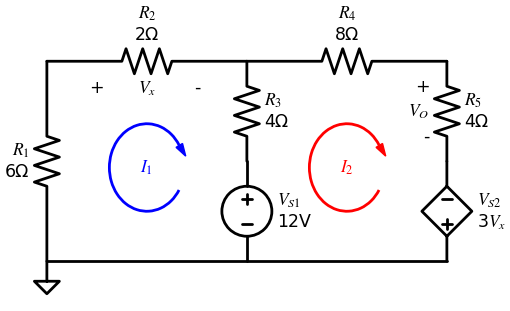

In [39]:



with schemdraw.Drawing(file='mesh-dependent-shortcut.svg') as d:
    d.config(unit=4)
    d += (R1 := elm.Resistor().up().label('$R_1$\n6Ω'))
    d += (R2 := elm.Resistor().right().label('$R_2$\n2Ω').label(('+','$V_x$','-'),loc='bottom'))
    d += (R4 := elm.Resistor().right().label('$R_4$\n8Ω'))
    d += (R5 := elm.Resistor().down().length(2).label('$R_5$\n4Ω',loc='bottom').label(('+','$V_O$','-'),loc='top'))
    d += (Vs2 := elm.SourceControlledV().down().length(2).label('$V_{S2}$\n3$V_x$',loc='bottom'))
    d += (LineB := elm.Line().left().tox(R1.start))
    d += (GndSig := elm.GroundSignal())
    d += (R3 := elm.Resistor().at(R2.end).down().length(2).label('$R_3$\n4Ω',loc='bottom'))
    d += (Vs2 := elm.SourceV().down().length(2).label('$V_{S1}$\n12V',loc='bottom').reverse())
    d += elm.LoopCurrent([R2,R3,LineB,R1],pad=1).label('$I_1$').color('blue')
    d += elm.LoopCurrent([R4,R5,LineB,R3],pad=1).label('$I_2$').color('red')

`````{admonition} Example
Find the mesh currents
```{figure} mesh-dependent-shortcut.svg
---
height: 300px
name: mesh-dependent-shortcut
---
```
````{admonition} Solution - Pure shortcut
:class: tip, dropdown
To pull this off, I add the control variable as an additional unknown.  For his circuit the unknowns are $I_1$, $I_2$, and $V_x$.

The KVL around $I_1$ is typical so I will include that in the first writing of the system

$$\begin{array}{c}
\text{KVL $I_1$}\\
\text{KVL $I_2$}\\
V_x\text{ expression}\\
\end{array}\left[ \begin{array}{ccc}
12&-4&0\\
~&~&~\\
~&~&~\\
\end{array} \right]^{-1}\left[\begin{array}{c}-12\\~\\~\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\\V_x\end{array}\right]=\left[\begin{array}{c}~\\~\\~\end{array}\right]$$

The KVL around $I_2$ includes the dependent supply.  We can include this in the system by writing the gain, with the correct sign, in the column that corresponds to the control variable.

$I_1$ and $I_2$ share $R_3$ so -4 is the entry in the first column.  $I_2$ touches $R_3$, $R_4$, and $R_5$ on this mesh so their sum, +16, is the entry in the second column.  The dependent supply causes a rise as we move clockwise around the mesh.  We're accustomed to a rise being positive as we include it on the right-hand side of the equation.  In this case this entry in on the left-hand side of the equation so it is negative.  The gain is 3 making the entry in the third column -3.  The right-hand side of the equation is the rise across $V_{S1}$ making it +12.

$$\begin{array}{c}
\text{KVL $I_1$}\\
\text{KVL $I_2$}\\
V_x\text{ expression}\\
\end{array}\left[ \begin{array}{ccc}
12&-4&0\\
-4&16&-3\\
~&~&~\\
\end{array} \right]^{-1}\left[\begin{array}{c}-12\\+12\\~\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\\V_x\end{array}\right]=\left[\begin{array}{c}~\\~\\~\end{array}\right]$$

Finally we need the expression for the control variable.  Let's stop and think about what the equation is and how we can get that equation simply by looking at the circuit.  The equation is

$$V_x=2I_1$$

to include in the system we need to treat $V_x$ as an unknown.  Let's move all of the unknowns to the left side of the expression

$$0=2I_1-V_x$$

 or

$$2I_1-V_x=0$$

When I enter these values directly in the matrix I start with a -1 in the column that corresponds with the control variable.  I then ask which mesh currents flow through the resistor and in which direction.  In this case only $I_1$ flows through $R_2$ and it flows in the positive direction according to the passive sign convention.  That leads to a +2 as the entry in the first column.  $I_2$ does not flow through $R_2$ therefore there is a 0 in the second column.

$$\begin{array}{c}
\text{KVL $I_1$}\\
\text{KVL $I_2$}\\
V_x\text{ expression}\\
\end{array}\left[ \begin{array}{ccc}
12&-4&0\\
-4&16&-3\\
2&0&-1\\
\end{array} \right]^{-1}\left[\begin{array}{c}-12\\+12\\0\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\\V_x\end{array}\right]=\left[\begin{array}{c}~\\~\\~\end{array}\right]$$

We can then solve the system

$$\begin{array}{c}
\text{KVL $I_1$}\\
\text{KVL $I_2$}\\
V_x\text{ expression}\\
\end{array}\left[ \begin{array}{ccc}
12&-4&0\\
-4&16&-3\\
2&0&-1\\
\end{array} \right]^{-1}\left[\begin{array}{c}-12\\+12\\0\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\\V_x\end{array}\right]=\left[\begin{array}{c}-947.4\text{mA}\\157.9\text{mA}\\-1.895V\end{array}\right]$$

Take a moment to compare these result against our earlier result.  You will find they are consistent.

````

````{admonition} Solution - Hybrid
:class: tip, dropdown
For this circuit one equation can be written with the shortcut.  The other cannot.  My habit is to not force the issue of using the shortcut in absolutely every situation.  I write as much of the system as a I can with out involving the dependent supply.  In this case that is only the KVL around $I_1$.

$$\begin{array}{c}
\text{KVL $I_1$}\\
\text{KVL $I_2$}\\
\end{array}\left[ \begin{array}{cc}
12&-4\\
~&~\\
\end{array} \right]^{-1}\left[\begin{array}{c}-12\\~\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}~\\~\end{array}\right]$$

I then write the equation(s) the include the dependent supply in the usual manner.

\begin{eqnarray*}
\color{red}V_{S1}-V_{R3}-V_{R4}-V_{R5}+3V_x=0\\
\color{red}V_{S1}-(I_2-I_1)R_3-I_2R_4-I_2R_5+3V_x=0\\
\end{eqnarray*}

The expression for the control variable is

$$V_x=2I_1$$

which is substituted into the equation

\begin{eqnarray*}
\color{red}V_{S1}-(I_2-I_1)R_3-I_2R_4-I_2R_5+3(2I_1)=0\\
\color{red}-R_3I_2+R_3I_1-R_4I_2-R_5I_2+6I_1=-V_{S1}\\
\color{red}(6+R_3)I_1+(-R_3-R_4-R_5)I_2=-V_{S1}\\
\color{red}10I_1-16I_2=-12\\
\end{eqnarray*}

Entering the equation into the system give us

$$\begin{array}{c}
\text{KVL $I_1$}\\
\text{KVL $I_2$}\\
\end{array}\left[ \begin{array}{cc}
12&-4\\
10&-16\\
\end{array} \right]^{-1}\left[\begin{array}{c}-12\\-12\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}~\\~\end{array}\right]$$

which is solved as

$$\begin{array}{c}
\text{KVL $I_1$}\\
\text{KVL $I_2$}\\
\end{array}\left[ \begin{array}{cc}
12&-4\\
10&-16\\
\end{array} \right]^{-1}\left[\begin{array}{c}-12\\-12\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}-947.4\text{mA}\\157.9\text{mA}\end{array}\right]$$

The mesh currents match our previous two solutions for this circuit.  I take this route since I have more confidence in the outcome.  Speed is good.  Accuracy is better.

````
`````

The shortcut can be used with a dependent current supply as well. Here is another example.

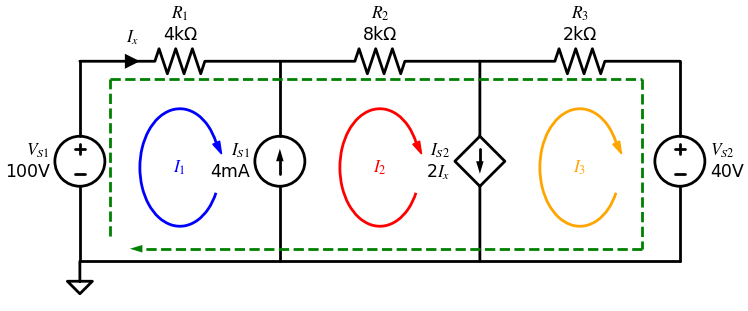

In [40]:



with schemdraw.Drawing(file='mesh-dependent-supers-annotated-supermesh-shortcut.svg') as d:
    d.config(unit=4)
    d += (Vs1 := elm.SourceV().up().label('$V_{S1}$\n100V'))
    d += (R1 := elm.Resistor().right().label('$R_{1}$\n4kΩ'))
    d += (R2 := elm.Resistor().right().label('$R_{2}$\n8kΩ'))
    d += (R3 := elm.Resistor().right().label('$R_{3}$\n2kΩ'))
    d += (Vs2 := elm.SourceV().down().label('$V_{S2}$\n40V',loc='bottom').reverse())
    d += (LineB := elm.Line().left().tox(R1.start))
    d += (GndSig := elm.GroundSignal())
    d += (Is1 := elm.SourceI().at(R1.end).down().label('$I_{S1}$\n4mA').reverse())
    d += (Is2 := elm.SourceControlledI().at(R2.end).down().label('$I_{S2}$\n2$I_x$'))
    d += elm.CurrentLabelInline(direction='in').at(R1).label('$I_x$')
    d += elm.LoopCurrent([R1,Is1,LineB,Vs1],pad=0.7).label('$I_1$').color('blue')
    d += elm.LoopCurrent([R2,Is2,LineB,Is1],pad=0.7).label('$I_2$').color('red')
    d += elm.LoopCurrent([R3,Vs2,LineB,Is2],pad=0.7).label('$I_3$').color('orange')

    d += elm.Line().linestyle('--').at(Vs.start,dx=0.6,dy=0.5).up().color('green').toy(3.65)
    d += elm.Line().linestyle('--').right().color('green').tox(11.25)
    d += elm.Line().linestyle('--').down().color('green').toy(0.25)
    d += elm.Line(arrow='->').linestyle('--').left().color('green').tox(1)

`````{admonition} Example
Find the mesh currents
```{figure} mesh-dependent-supers-annotated-supermesh-shortcut.svg
---
height: 300px
name: mesh-dependent-supers-annotated-supermesh-shortcut
---
```
````{admonition} Solution - Pure shortcut
:class: tip, dropdown
In this case we have four unknowns, $I_1$, $I_2$, $I_3$, and $I_x$.  The KCL for $I_{S1}$ and the super KVL can be entered in the usual manner using the shortcut.  Let's start with a system that has them entered already.

$$\begin{array}{c}
\text{KCL Super($I_1$,$I_2$)}\\
\text{KVL Super($I_1$,$I_2$,$I_3$)}\\
\text{KCL Super($I_2$,$I_3$)}\\
I_x\text{ expression}\\
\end{array}\left[ \begin{array}{cccc}
-1&1&0&0\\
4\text{k}&8\text{k}&2\text{k}&0\\
~&~&~&~\\
~&~&~&~\\
\end{array} \right]^{-1}\left[\begin{array}{c}4\text{mA}\\60\text{V}\\~\\~\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\\I_3\\I_x\end{array}\right]=\left[\begin{array}{c}~\\~\\~\\~\end{array}\right]$$

Now for the equations involved with the dependent supply, the KCL for $I_{S2}$ and the expression for the control variable, $I_x$.  The currents are entered in the usual way, +1 for the $I_2$ column and -1 for the $I_3$ column.  Again, the gain is moved from the right side of the equation to the left with the other unknowns.  the gain will be negated and entered in the column corresponding to $I_x$, -2 in this case.

$$\begin{array}{c}
\text{KCL Super($I_1$,$I_2$)}\\
\text{KVL Super($I_1$,$I_2$,$I_3$)}\\
\text{KCL Super($I_2$,$I_3$)}\\
I_x\text{ expression}\\
\end{array}\left[ \begin{array}{cccc}
-1&1&0&0\\
4\text{k}&8\text{k}&2\text{k}&0\\
0&1&-1&-2\\
~&~&~&~\\
\end{array} \right]^{-1}\left[\begin{array}{c}4\text{mA}\\60\text{V}\\0A\\~\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\\I_3\\I_x\end{array}\right]=\left[\begin{array}{c}~\\~\\~\\~\end{array}\right]$$

Finally we fill in the row for the control variable.  In this case it is a current.  Only $I_1$ touches $I_x$ and it flows in the same direction making the corresponding entry +1.  the other mesh currents do not touch $I_x$ so their entries are 0. $I_x$ would typically be on the other side of the equation but we move it to the side with the unknowns making it's entry -1.

$$\begin{array}{c}
\text{KCL Super($I_1$,$I_2$)}\\
\text{KVL Super($I_1$,$I_2$,$I_3$)}\\
\text{KCL Super($I_2$,$I_3$)}\\
I_x\text{ expression}\\
\end{array}\left[ \begin{array}{cccc}
-1&1&0&0\\
4\text{k}&8\text{k}&2\text{k}&0\\
0&1&-1&-2\\
1&0&0&-1\\
\end{array} \right]^{-1}\left[\begin{array}{c}4\text{mA}\\60\text{V}\\0A\\0A\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\\I_3\\I_x\end{array}\right]=\left[\begin{array}{c}~\\~\\~\\~\end{array}\right]$$

Solving the system gives us

$$\begin{array}{c}
\text{KCL Super($I_1$,$I_2$)}\\
\text{KVL Super($I_1$,$I_2$,$I_3$)}\\
\text{KCL Super($I_2$,$I_3$)}\\
I_x\text{ expression}\\
\end{array}\left[ \begin{array}{cccc}
-1&1&0&0\\
4\text{k}&8\text{k}&2\text{k}&0\\
0&1&-1&-2\\
1&0&0&-1\\
\end{array} \right]^{-1}\left[\begin{array}{c}4\text{mA}\\60\text{V}\\0A\\0A\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\\I_3\\I_x\end{array}\right]=\left[\begin{array}{c}2\text{mA}\\6\text{mA}\\2\text{mA}\\2\text{mA}\end{array}\right]$$

Compare this result to our earlier analysis and you'll find it is consistent.

````
````{admonition} Solution - Hybrid
:class: tip, dropdown
I am more likely to take the hybrid approach.  Part shortcut, part normal.  This is personal preference. Just get the right answer.

The KCL for $I_{S1}$ and the super KVL can be entered in the usual manner using the shortcut.  Let's start with a system that has them entered already.

$$\begin{array}{c}
\text{KCL Super($I_1$,$I_2$)}\\
\text{KVL Super($I_1$,$I_2$,$I_3$)}\\
\text{KCL Super($I_2$,$I_3$)}\\
\end{array}\left[ \begin{array}{ccc}
-1&1&0\\
4\text{k}&8\text{k}&2\text{k}\\
~&~&~\\
\end{array} \right]^{-1}\left[\begin{array}{c}4\text{mA}\\60\text{V}\\~\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\\I_3\end{array}\right]=\left[\begin{array}{c}~\\~\\~\end{array}\right]$$

I then write the KCL for $I_{S2}$ in the usual manner
The KCL for $I_{S2}$ involves the dependent supply for we need to perform the substitution for the control variable.  $I_x$ in terms of the mesh currents is

$$I_x=I_1$$

which we substitute into the KCL for $I_{S2}$.

\begin{eqnarray*}
I_2-I_3=2I_x\\
I_2-I_3=2I_1\\
-2I_1+I_2-I_3=0\\
\end{eqnarray*}

and then enter the equation into the system

$$
\begin{array}{c}
\text{KCL Super($I_1$,$I_2$)}\\
\text{KVL Super($I_1$,$I_2$,$I_3$)}\\
\text{KCL Super($I_2$,$I_3$)}\\
\end{array}\left[ \begin{array}{ccc}
-1&1&0\\
4\text{k}&8\text{k}&2\text{k}\\
-2&1&-1\\
\end{array} \right]^{-1}\left[\begin{array}{c}4\text{mA}\\60\text{V}\\0\text{A}\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\\I_3\end{array}\right]=\left[\begin{array}{c}2\text{mA}\\6\text{mA}\\2\text{mA}\end{array}\right]
$$

More consistent results!  Check against the previous to examples of analyzing this circuit.
````
`````

(subsection-mesh-strategy)=

## Strategy for Mesh Analysis

The examples I've worked are intended to teach you how to deal with the little oddities that arise when performing mesh analysis. If you master these you will be able to analyze most linear electric circuits. I've also shown you how to use the "shortcut" to perform mesh analysis quickly. With practice you may be able to analyze most circuits simply by looking at the circuit and using your calculator to build the system of equations.

Not all circuits require you to use the techniques introduced here. When I first begin analysis of a circuit I look for certain conditions and I make a plan to deal with them. I will do my best to summarize the strategy I use when analyzing a circuit.

1. **How many meshes?** The number of meshes define how many unknowns will be part of the system and, therefore, how many equations you will have to write.

2. **Are there current supplies?** Each current supply means you will write a KCL equation instead of a KVL. Also notice I say "current supply". I don't say "dependent supply" or "independent supply" since the type of current supply does not matter.

   a. **Does the current supply touch a single mesh current?** This is the simpler of the two conditions created by current supplies in the circuit. Just write a KCL for the current supply and skip the KVL for the mesh current that flows through the current supply.

   b. **Does the current supply touch two mesh currents?** This condition creates a "super-loop" or "super-mesh". The KCL is written in the same way as the previous case. The difference here is found in how you will write one of the KVLs. Rather than writing a KVL around a single mesh you will write a KVL around two or more meshes. It is best if you write the KVL around the two meshes that flow through the current supply.

3. **Are there any dependent supplies?** Look for diamond shaped supplies. It does not matter whether they are voltage or current supplies. Locate the control variable on the schematic and write an expression for it in terms of the unknown mesh currents. This expression is written in a similar manner to finding the output values of the analysis. You should use this expression anytime the control variable shows up in the system of equations.

4. **Write the equations** If you've answered the questions above you should know which equations you will include in the system. Write them carefully and use good practice with regards to the signs and order of coefficients.

5. **Solve the system** Matrix inversion works. So does row-reduced echelon form. If you'd like use software like MATLAB to solve the system. Just find the answer.

6. **Find output of analysis** Once you know the mesh current you can find any other value in the circuit. The output of the analysis may take a few different forms.

   a. **Is the value a current?** If the value is a current you can write a KCL equation to find the output. Pay attention to the direction of the current as labeled on the schematic and which mesh currents touch that arrow.

   b. **Is the value a voltage across a single passive component?** If the value is a voltage across a passive component use a combination of KCL and Ohm's law to find that voltage. Find the current as you did for the previous output type respecting passive sign convention for the labeled voltage polarity. Use that current and the resistance (or impedance in later chapters) to find the voltage. This is useful for finding voltages that are outputs of the analysis as well as finding voltages that are intermediate values for the next type of output value.

   c. **Is the value a voltage across multiple components or a current supply?** If the value is a voltage measured across multiple components or a component with an unknown resistance you will have to use a KVL. This means you have to find other voltages using the previous method. Write a KVL around a loop that includes the unknown voltage. Find all of the other voltages in the loop. Solve for the unknown voltage.